<a href="https://colab.research.google.com/github/dariemoldovan/majority-voting-reviews-sentiment/blob/main/Flipkart_sentiment_aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sentiment.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bert/flipkart_all_sentiment.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-6-e003b7dbaf78>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Rating', palette='viridis')


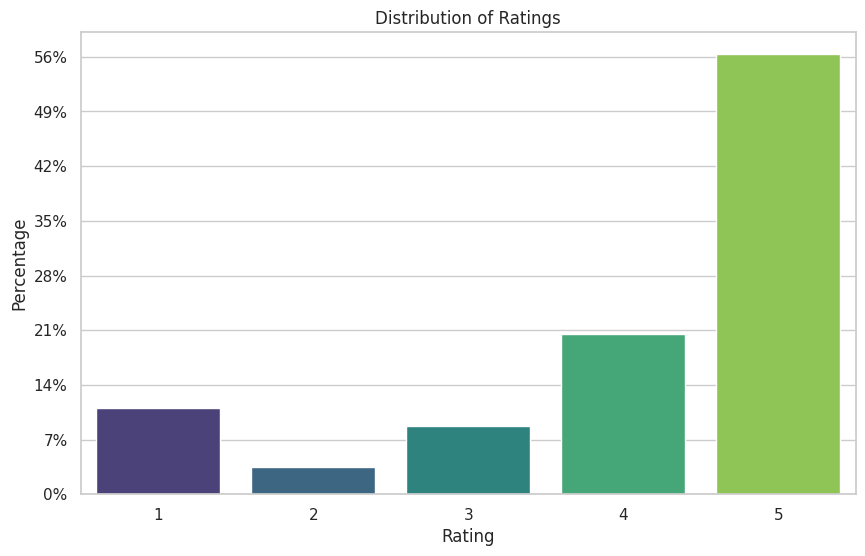

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming df is your DataFrame with the 'Rate' column

# Rename the column 'Rate' to 'Rating'
df.rename(columns={'Rate': 'Rating'}, inplace=True)

# Calculate percentage of each rating count
total_ratings = len(df)
rating_counts = df['Rating'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=df, x='Rating', palette='viridis')

# Set y-axis ticks as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_ratings))

#plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming df is your DataFrame with the 'Rate' column

# Rename the column 'Rate' to 'Rating'
df.rename(columns={'Rate': 'Rating'}, inplace=True)

# Calculate percentage of each rating count
total_ratings = len(df)
rating_counts = df['Rating'].value_counts(normalize=True) * 100

# Set initial figure size (width, height) in inches
initial_width, initial_height = 10, 6

# Calculate aspect ratio
aspect_ratio = initial_width / initial_height

# Set minimum dimension in pixels
min_pixels = 900

# Determine new figure size based on the minimum dimension
if initial_width >= initial_height:
    new_width = min_pixels / 100
    new_height = new_width / aspect_ratio
else:
    new_height = min_pixels / 100
    new_width = new_height * aspect_ratio

# Plotting with resolution adjustment
plt.figure(figsize=(new_width, new_height), dpi=100)
sns.set(style="whitegrid")
ax = sns.countplot(data=df, x='Rating', palette='viridis')

# Set y-axis ticks as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_ratings))

#plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.show()

NameError: name 'df' is not defined

In [ ]:
len(df)

357528

##Vader

In [ ]:
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# download nltk corpus (first time only)
import nltk

nltk.download('all')

In [ ]:
print(df.shape)

(357528, 9)


In [ ]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply function to DataFrame
df['VSC'] = df['Summary'].apply(get_sentiment_scores)

print(df)

            ID                                       Product name  Price  \
0            0  Crompton 75 L Desert Air Cooler??(White, Tea...  10499   
1            1  Crompton 75 L Desert Air Cooler??(White, Tea...  10499   
2            2  Crompton 75 L Desert Air Cooler??(White, Tea...  10499   
3            3  Crompton 75 L Desert Air Cooler??(White, Tea...  10499   
4            4  Crompton 75 L Desert Air Cooler??(White, Tea...  10499   
...        ...                                                ...    ...   
357523  359615  NIVEA Soft Light Moisturizer for Face, Hand & ...    142   
357524  359616  NIVEA Soft Light Moisturizer for Face, Hand & ...    142   
357525  359617  NIVEA Soft Light Moisturizer for Face, Hand & ...    142   
357526  359618  NIVEA Soft Light Moisturizer for Face, Hand & ...    142   
357527  359619  NIVEA Soft Light Moisturizer for Face, Hand & ...    142   

        Rate                                              Title  \
0          5        

In [ ]:
#df.to_csv('/content/drive/MyDrive/Bert/flipkart_all_sent.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sent2.csv')
df.head()

<ipython-input-3-8212f4a6b6d1>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sent2.csv')


,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference
0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,positive,0.336,positive,neutral/mixed,0.9827,1.0,0.664
1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,positive,0.334,positive,positive,0.9300,0.5,0.166
2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,positive,0.435,positive,positive,0.9589,1.0,0.565
3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,neutral/mixed,0.175,positive,positive,0.9524,1.0,0.825
4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,positive,0.499,positive,positive,0.9681,0.5,0.001


In [ ]:
len(df)

357528

In [ ]:
df['AWS'] = df['AWS'].str.lower()

# Replace 'mixed' with 'neutral/mixed' in the specified column
df['AWS'] = df['AWS'].replace('neutral', 'neutral/mixed')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference
0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,positive,0.336,positive,neutral/mixed,0.9827,1.0,0.664
1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,positive,0.334,positive,positive,0.9300,0.5,0.166
2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,positive,0.435,positive,positive,0.9589,1.0,0.565
3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,neutral/mixed,0.175,positive,positive,0.9524,1.0,0.825
4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,positive,0.499,positive,positive,0.9681,0.5,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357523,357523,357523,359615,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,good,positive,NaN,NaN,NaN,0.4404,1.0,NaN
357524,357524,357524,359616,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,thanks,positive,NaN,NaN,NaN,0.4404,1.0,NaN
357525,357525,357525,359617,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,good,positive,NaN,NaN,NaN,0.4404,1.0,NaN
357526,357526,357526,359618,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Just wow!,super,positive,0.938,NaN,NaN,0.5994,1.0,0.062


In [ ]:
#df.to_csv('/content/drive/MyDrive/Bert/flipkart_all_sent2.csv')

In [ ]:
'''
# Function to rescale ratings to match sentiment score range
def rescale_rating(rating):
    # Assuming ratings range from 1 to 5, rescale to range from -1 to 1
    return (rating - 3) / 2  # Rescale to range [-1, 1]

# Rescale ratings
df['Rescaled Rating'] = df['Rate'].apply(rescale_rating)
'''

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sent2.csv')

<ipython-input-6-24b634c5eac1>:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sent2.csv')


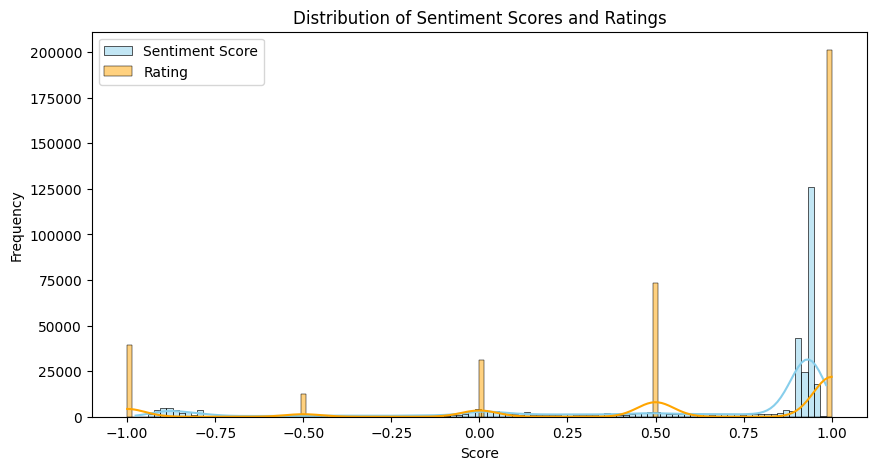

Correlation between sentiment scores and ratings: 0.6695432625445952


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation between sentiment scores and ratings
correlation = df['GNLP'].corr(df['Rescaled Rating'])

# Plot distributions
plt.figure(figsize=(10, 5))
sns.histplot(df['GNLP'], color='skyblue', label='Sentiment Score', kde=True)
sns.histplot(df['Rescaled Rating'], color='orange', label='Rating', kde=True)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores and Ratings')
plt.legend()
plt.show()

print(f"Correlation between sentiment scores and ratings: {correlation}")

In [ ]:
df['Sentiment difference']=df['Rescaled Rating']-df['GNLP']

In [ ]:
#Applying categorize_sentiment for both GNLP and Vader results
def categorize_sentiment(score):
    if score > 0.15:
        return 'positive'
    elif score < -0.15:
        return 'negative'
    else:
        return 'neutral/mixed'

# Create new variable 'Sentiment' based on 'Sentiment Score'
df['GOOG'] = df['GNLP'].apply(categorize_sentiment)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,VADER,GOOG
0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,positive,0.336,positive,neutral/mixed,0.9827,1.0,0.664,positive,positive
1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,positive,0.334,positive,positive,0.9300,0.5,0.166,positive,positive
2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,positive,0.435,positive,positive,0.9589,1.0,0.565,positive,positive
3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,neutral/mixed,0.175,positive,positive,0.9524,1.0,0.825,positive,positive
4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,positive,0.499,positive,positive,0.9681,0.5,0.001,positive,positive


In [ ]:
df.to_csv('/content/drive/MyDrive/Bert/flipkart_all_sent3.csv')

In [ ]:

filtered_df = df.dropna(subset=['GOOG', 'AWS','VADER', 'MSFT', 'IBM'])
# Select only the desired columns
filtered_df = df[['GOOG', 'AWS', 'VADER','MSFT','IBM']]

# Convert sentiment values to numerical values
#sentiment_mapping = {'positive': 1, 'neutral/mixed': 0, 'negative': -1}
#filtered_df.replace(sentiment_mapping, inplace=True)

# Calculate percentages
percentages = filtered_df.apply(lambda x: x.value_counts(normalize=True) * 100)

print(percentages)

                    GOOG        AWS      VADER       MSFT        IBM
negative       12.816619  12.171634   9.599248  11.904984  13.030552
neutral/mixed   9.462476  12.921785  14.348527  12.408011  13.929777
positive       77.720906  74.906581  76.052225  75.687005  73.039672


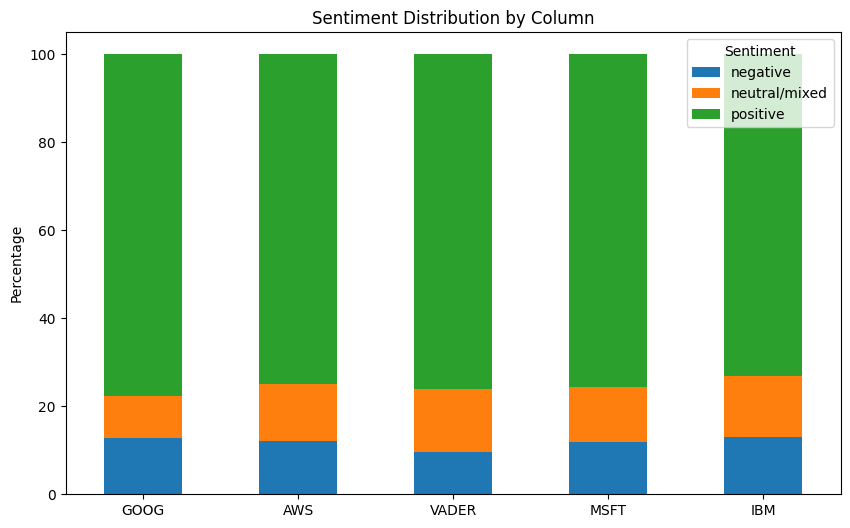

In [ ]:
# Plot stacked bar chart
import matplotlib.pyplot as plt
ax = percentages.T.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Percentage')
ax.set_title('Sentiment Distribution by Column')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()



<ipython-input-28-2229e9a07b77>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.replace(sentiment_mapping, inplace=True)


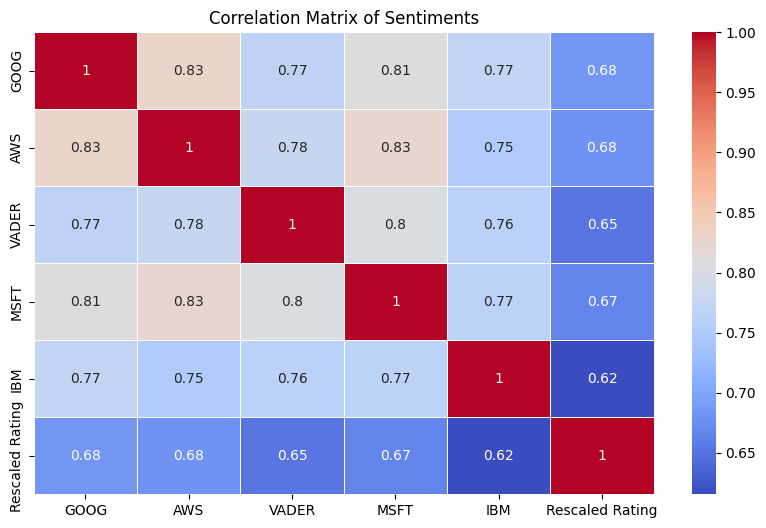

In [ ]:
import seaborn as sns
# Filter rows with values for all five columns
filtered_df = df.dropna(subset=['GOOG', 'AWS', 'VADER','MSFT','IBM','Rescaled Rating'])

# Convert sentiment values to numerical values for correlation calculation
sentiment_mapping = {'negative': -1, 'neutral/mixed': 0, 'positive': 1}
filtered_df.replace(sentiment_mapping, inplace=True)

# Calculate correlation matrix
correlation_matrix = filtered_df[['GOOG', 'AWS', 'VADER','MSFT','IBM','Rescaled Rating']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sentiments')
plt.show()

In [ ]:
filtered_df

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,VADER,GOOG
0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,1,0.336,1,0,0.9827,1.0,0.664,1,1
1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,1,0.334,1,1,0.9300,0.5,0.166,1,1
2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,1,0.435,1,1,0.9589,1.0,0.565,1,1
3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,0,0.175,1,1,0.9524,1.0,0.825,1,1
4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,1,0.499,1,1,0.9681,0.5,0.001,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21465,21465,21465,21471,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Horrible,colour faded away one wash,-1,-0.919,0,-1,0.0000,-1.0,-0.081,0,-1
21466,21466,21466,21472,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,amazing product ! loved,1,0.924,1,1,0.8398,1.0,0.076,1,1
21467,21467,21467,21473,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Nice product,like product .,1,0.935,0,1,0.3612,0.5,-0.435,1,1
21468,21468,21468,21474,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,good . color fade breach also .,1,0.056,1,1,0.4404,1.0,0.944,1,1


In [ ]:
dff=df.dropna()
dff.head()

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,GOOG,VADER
0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,positive,0.336,positive,neutral/mixed,0.9827,1.0,0.664,positive,positive
1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,positive,0.334,positive,positive,0.9300,0.5,0.166,positive,positive
2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,positive,0.435,positive,positive,0.9589,1.0,0.565,positive,positive
3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,neutral/mixed,0.175,positive,positive,0.9524,1.0,0.825,positive,positive
4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,positive,0.499,positive,positive,0.9681,0.5,0.001,positive,positive


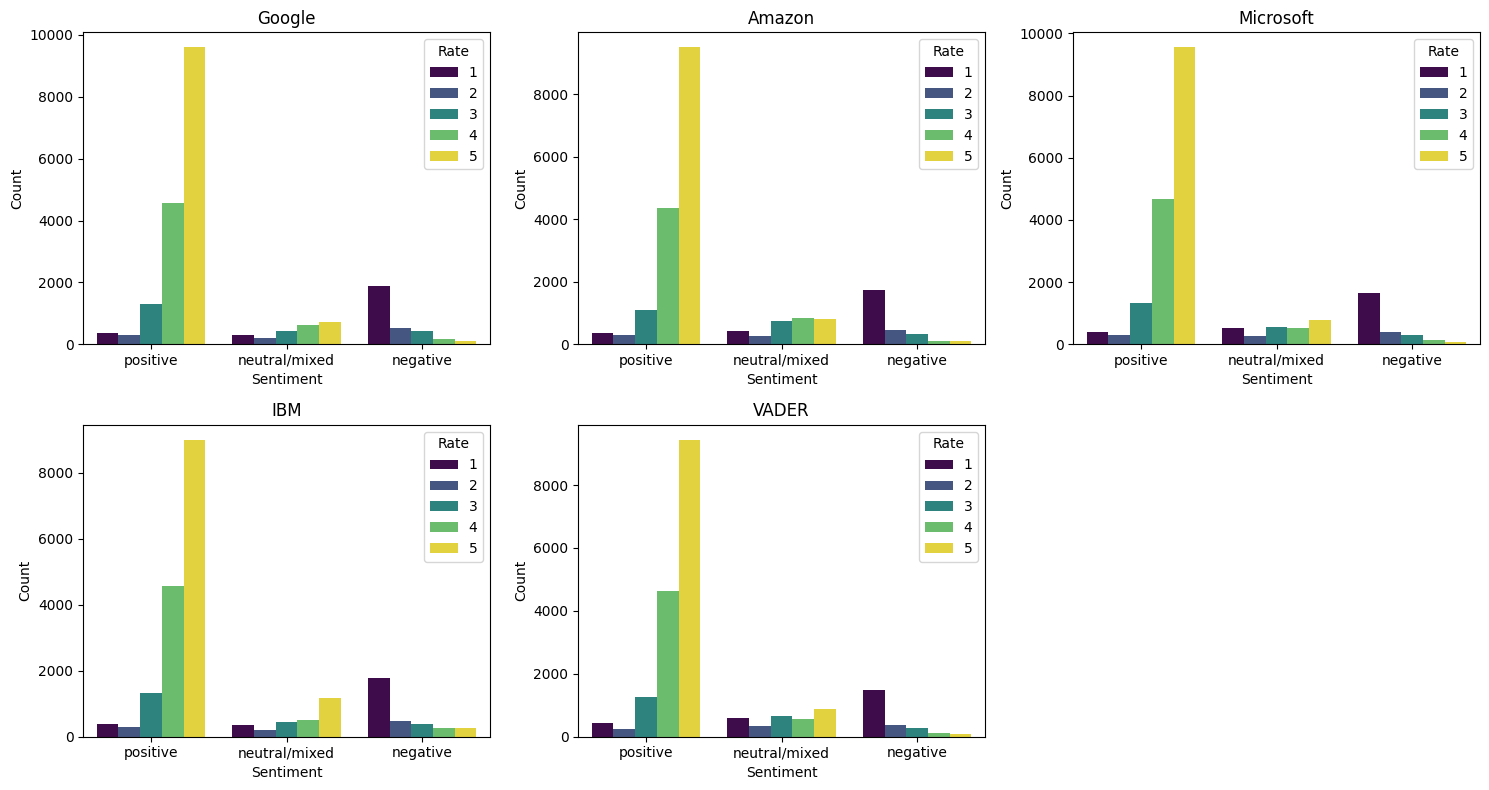

In [ ]:
# Dictionary to map original column names to desired names
column_names = {
    'GOOG': 'Google',
    'AWS': 'Amazon',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'VADER': 'VADER'
}

# Create subplots
num_rows = 2
num_cols = (len(column_names) + 1) // num_rows  # Adding 1 to include the Rate column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten axes if necessary
axes = axes.flatten()

# Set the order of x-axis labels
order = ['positive', 'neutral/mixed', 'negative']

# Iterate over column names and create charts
for i, (column, name) in enumerate(column_names.items()):
    sns.countplot(data=dff, x=column, hue='Rate', palette='viridis', ax=axes[i], order=order)
    axes[i].set_xlabel('Sentiment')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{name}')

# Remove empty subplot if the number of columns is odd
if len(column_names) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

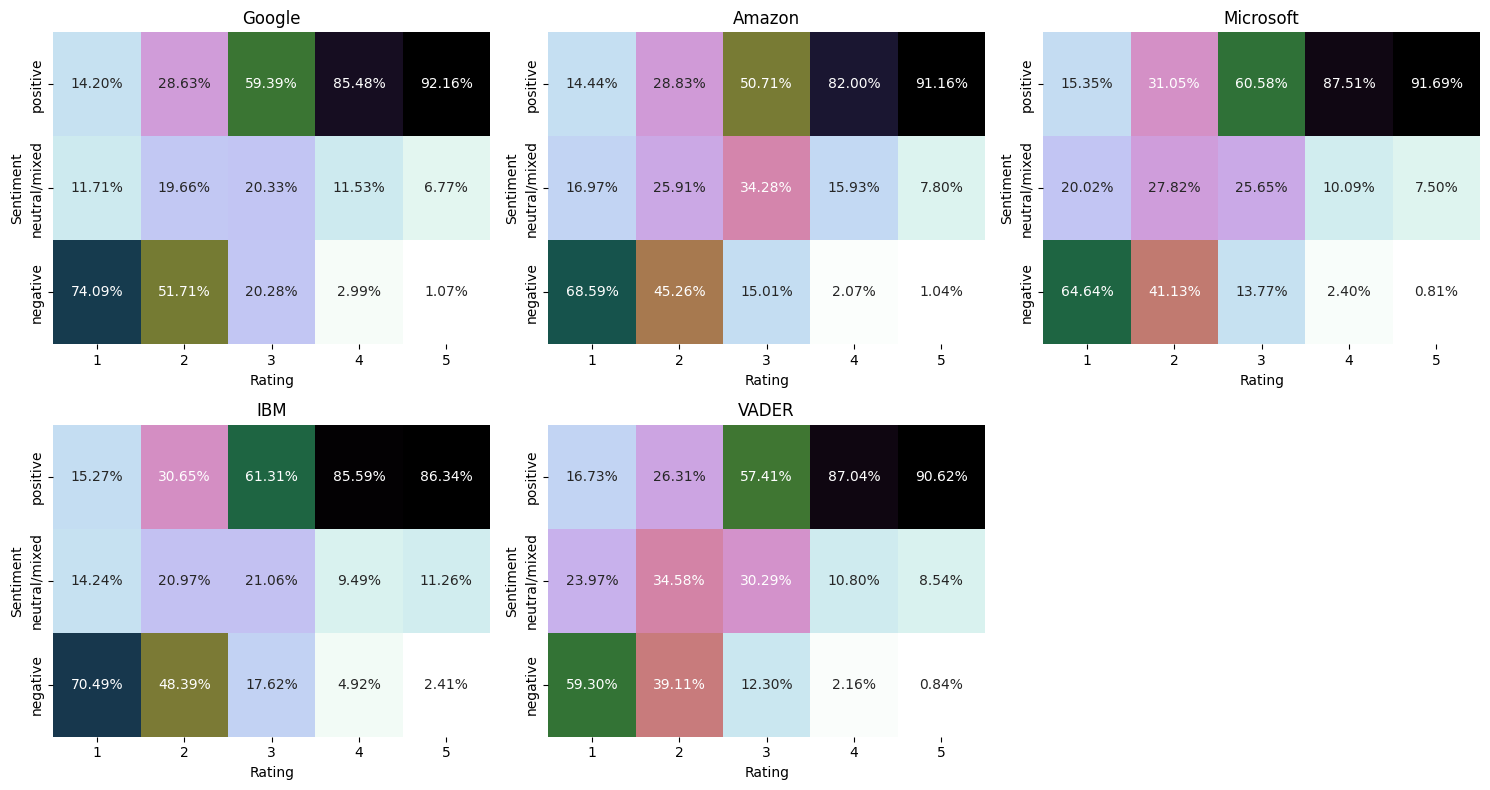

In [ ]:
# Create subplots
num_rows = 2
num_cols = (len(column_names) + 1) // num_rows  # Adding 1 to include the Rate column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten axes if necessary
axes = axes.flatten()

# Iterate over column names and create tables
for i, (column, name) in enumerate(column_names.items()):
    table_data = dff.groupby([column, 'Rate']).size().unstack().reindex(order).fillna(0)
    # Normalize each row separately to ensure that percentages sum up to 100% for each rating
    table_data = table_data.div(table_data.sum(axis=0), axis=1)
    sns.heatmap(table_data, annot=True, cmap='cubehelix_r', ax=axes[i], cbar=False, fmt=".2%")
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Sentiment')

# Remove empty subplot if the number of columns is odd
if len(column_names) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
dff.to_csv('/content/drive/MyDrive/Bert/flipkart_before_aggregation.csv')

##Sentiment Aggregator

In [ ]:

import pandas as pd
dff = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_before_aggregation.csv')

# Define a function to calculate sentiment based on majority voting and tie-breaking using Rate
def calculate_sentiment(row):
    sentiments = row[['GOOG', 'AWS', 'IBM', 'MSFT', 'VADER']]
    sentiment_counts = sentiments.value_counts()
    max_count = sentiment_counts.max()

    # Print information for debugging
    #print("Sentiments:", sentiments)
    #print("Sentiment counts:", sentiment_counts)
    #print("Max count:", max_count)

    # Check if there's a tie in sentiment counts
    if sentiment_counts.eq(max_count).sum() > 1:
        tied_sentiments = sentiment_counts[sentiment_counts == max_count].index.tolist()

        # Print information about tie
        #print("Tied sentiments:", tied_sentiments)

        # Check if the 'Rate' value is one of the tied sentiment values
        if row['Rate'] in tied_sentiments:
            #print("Chosen sentiment (Rate):", row['Rate'])
            return row['Rate']

        # If 'Rate' is not one of the tied sentiment values, return 'tie'
        else:
            #print("Decision: Tie, Rate: ", row['Rate'])
            return 'tie'

    # Use majority voting
    majority_sentiment = sentiment_counts.idxmax()
    #print("Majority sentiment:", majority_sentiment)
    return majority_sentiment

# Slice the DataFrame to include only the first 50 rows
#df_subset = dff.head(50)

# Apply the function to each row to calculate the sentiment
dff['Sentiment'] = dff.apply(calculate_sentiment, axis=1)


NameError: name 'sns' is not defined

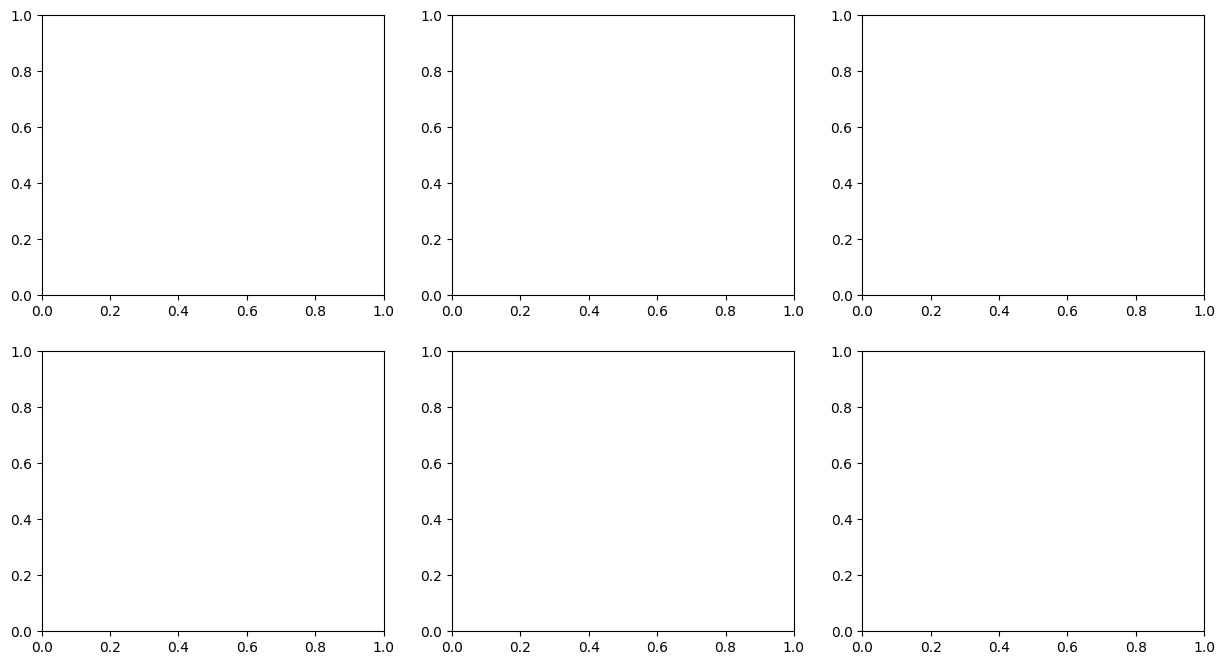

In [ ]:
# Dictionary to map original column names to desired names
column_names = {
    'GOOG': 'Google',
    'AWS': 'Amazon',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'VADER': 'VADER',
    'Sentiment' : "Aggregated Sentiment"
}

# Create subplots
num_rows = 2
num_cols = (len(column_names) + 1) // num_rows  # Adding 1 to include the Rate column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten axes if necessary
axes = axes.flatten()

# Set the order of x-axis labels
order = ['positive', 'neutral/mixed', 'negative']

# Iterate over column names and create charts
for i, (column, name) in enumerate(column_names.items()):
    sns.countplot(data=dff, x=column, hue='Rate', palette='viridis', ax=axes[i], order=order)
    axes[i].set_xlabel('Sentiment')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{name}')

# Remove empty subplot if the number of columns is odd
if len(column_names) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

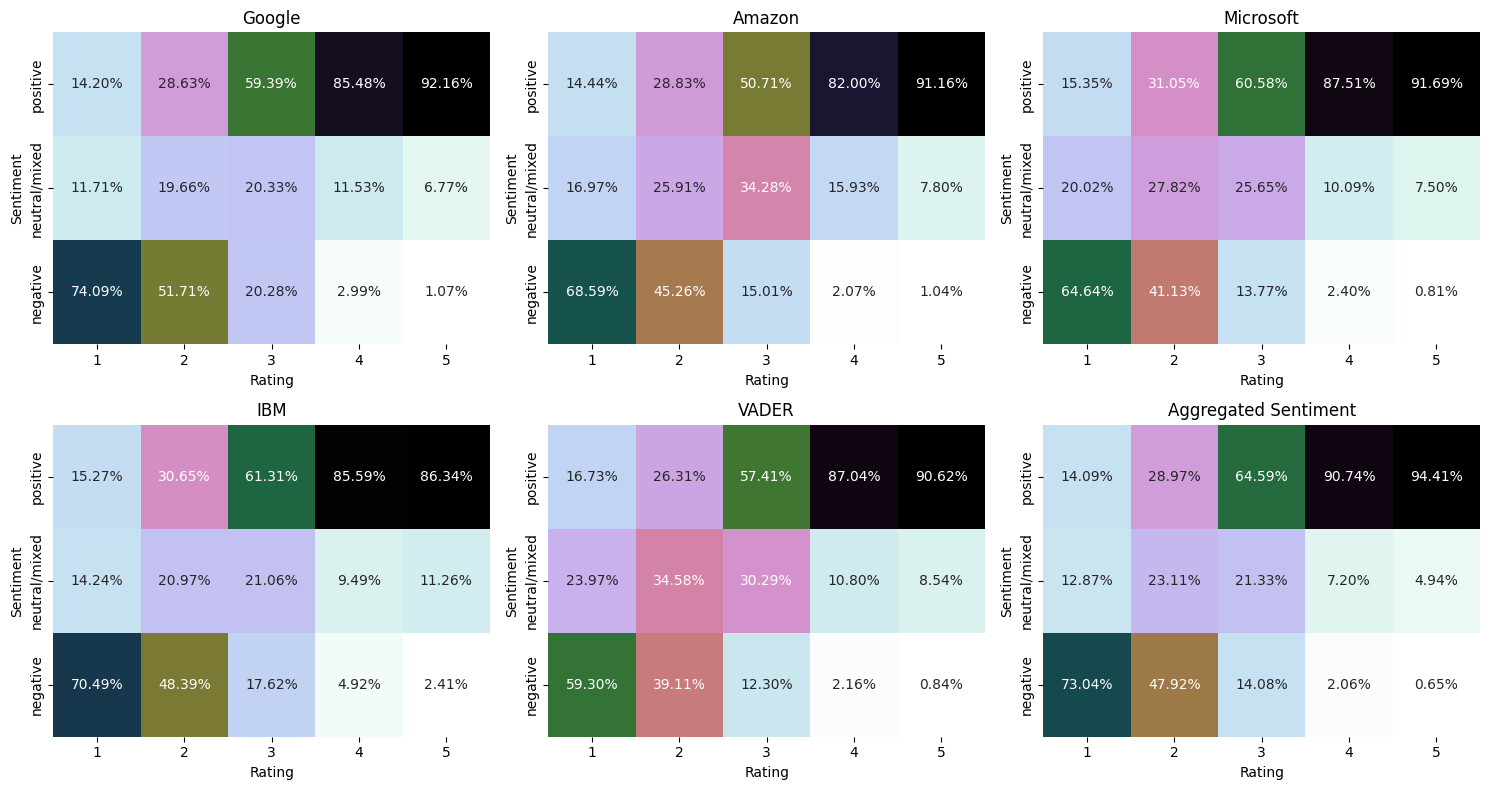

In [ ]:
# Create subplots
num_rows = 2
num_cols = (len(column_names) + 1) // num_rows  # Adding 1 to include the Rate column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten axes if necessary
axes = axes.flatten()

# Iterate over column names and create tables
for i, (column, name) in enumerate(column_names.items()):
    table_data = dff.groupby([column, 'Rate']).size().unstack().reindex(order).fillna(0)
    # Normalize each row separately to ensure that percentages sum up to 100% for each rating
    table_data = table_data.div(table_data.sum(axis=0), axis=1)
    sns.heatmap(table_data, annot=True, cmap='cubehelix_r', ax=axes[i], cbar=False, fmt=".2%")
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Sentiment')

# Remove empty subplot if the number of columns is odd
if len(column_names) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
filtered_df

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,GOOG,VADER
0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,1,0.336,1,0,0.9827,1.0,0.664,1,1
1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,1,0.334,1,1,0.9300,0.5,0.166,1,1
2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,1,0.435,1,1,0.9589,1.0,0.565,1,1
3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,0,0.175,1,1,0.9524,1.0,0.825,1,1
4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,1,0.499,1,1,0.9681,0.5,0.001,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21465,21465,21465,21471,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Horrible,colour faded away one wash,-1,-0.919,0,-1,0.0000,-1.0,-0.081,-1,0
21466,21466,21466,21472,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,amazing product ! loved,1,0.924,1,1,0.8398,1.0,0.076,1,1
21467,21467,21467,21473,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Nice product,like product .,1,0.935,0,1,0.3612,0.5,-0.435,1,1
21468,21468,21468,21474,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,good . color fade breach also .,1,0.056,1,1,0.4404,1.0,0.944,0,1


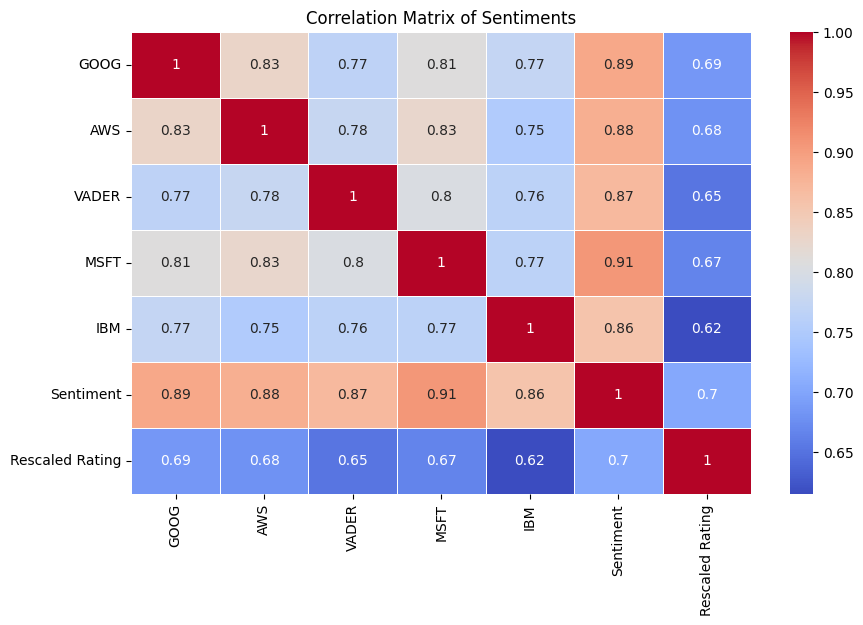

In [ ]:
import seaborn as sns
# Filter rows with values for all five columns
filtered_df = dff.dropna(subset=['GOOG', 'AWS', 'VADER','MSFT','IBM','Sentiment','Rescaled Rating'])
#filtered_df=filtered_df[filtered_df['Sentiment'] != 'tie']
# Convert sentiment values to numerical values for correlation calculation
sentiment_mapping = {'negative': -1, 'neutral/mixed': 0, 'positive': 1, 'tie':0}
filtered_df.replace(sentiment_mapping, inplace=True)

# Calculate correlation matrix
correlation_matrix = filtered_df[['GOOG', 'AWS', 'VADER','MSFT','IBM','Sentiment','Rescaled Rating']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sentiments')
plt.show()

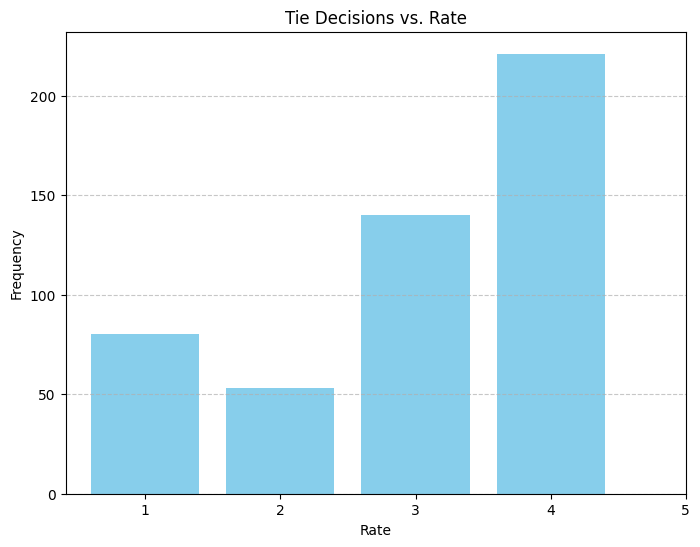

In [ ]:
import matplotlib.pyplot as plt

# Filter rows where the decision is a tie
tie_decisions = dff[dff['Sentiment'] == 'tie']

# Plot the 'Rate' values for tie decisions
plt.figure(figsize=(8, 6))
plt.hist(tie_decisions['Rate'], bins=[1, 2, 3, 4, 5], align='left', rwidth=0.8, color='skyblue')
plt.title('Tie Decisions vs. Rate')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Filter rows where predicted sentiment is 'tie'
tie_examples = dff[dff['Sentiment'] == 'tie']

# Show examples of rows where predicted sentiment is 'tie'
tie_examples.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,GOOG,VADER,Sentiment
24,24,24,24,24,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Good quality product,"value money.pros,1.cooling effect - give bette...",neutral/mixed,-0.071,negative,negative,0.9382,0.5,0.571,neutral/mixed,positive,tie
65,65,65,65,65,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,1,Did not meet expectations,old model n't outlet draining dirty water . cl...,neutral/mixed,-0.363,negative,neutral/mixed,0.8627,-1.0,-0.637,negative,positive,tie
99,99,99,99,99,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Highly recommended,"better plastic quality symphony , better price...",neutral/mixed,-0.237,positive,neutral/mixed,0.8750,1.0,1.237,negative,positive,tie
188,188,188,188,188,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,2,Slightly disappointed,"cooling wise 's good , , , taking noise , , , ...",positive,-0.396,positive,neutral/mixed,0.2732,-0.5,-0.104,negative,neutral/mixed,tie
246,246,246,246,246,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,1,Hated it!,cooling per expectation .. even cooling 35 ? ?...,negative,-0.269,positive,neutral/mixed,0.3939,-1.0,-0.731,negative,positive,tie


##Dropping examples with large differences

In [ ]:
filtered_df=filtered_df[filtered_df['Sentiment'] != 'tie']

In [ ]:
filtered_df

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,VADER,GOOG,Sentiment,Sentiment_Mapped
0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,1,0.336,1,0,0.9827,1.0,0.664,1,1,1,NaN
1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,1,0.334,1,1,0.9300,0.5,0.166,1,1,1,NaN
2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,1,0.435,1,1,0.9589,1.0,0.565,1,1,1,NaN
3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,0,0.175,1,1,0.9524,1.0,0.825,1,1,1,NaN
4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,1,0.499,1,1,0.9681,0.5,0.001,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21465,21465,21465,21471,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Horrible,colour faded away one wash,-1,-0.919,0,-1,0.0000,-1.0,-0.081,0,-1,-1,NaN
21466,21466,21466,21472,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,amazing product ! loved,1,0.924,1,1,0.8398,1.0,0.076,1,1,1,NaN
21467,21467,21467,21473,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Nice product,like product .,1,0.935,0,1,0.3612,0.5,-0.435,1,1,1,NaN
21468,21468,21468,21474,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,good . color fade breach also .,1,0.056,1,1,0.4404,1.0,0.944,1,0,1,NaN


In [ ]:
# Define the mapping dictionary

#sentiment_mapping = {'negative': -1, 'neutral/mixed': 0, 'positive': 1}
# Create a new column using map
#filtered_df['Sentiment_Mapped'] = filtered_df['Sentiment'].map(sentiment_mapping)

In [ ]:
filtered_df['Sentiment difference']=filtered_df['Rescaled Rating']-filtered_df['Sentiment']

In [ ]:
filtered_df=filtered_df.dropna()

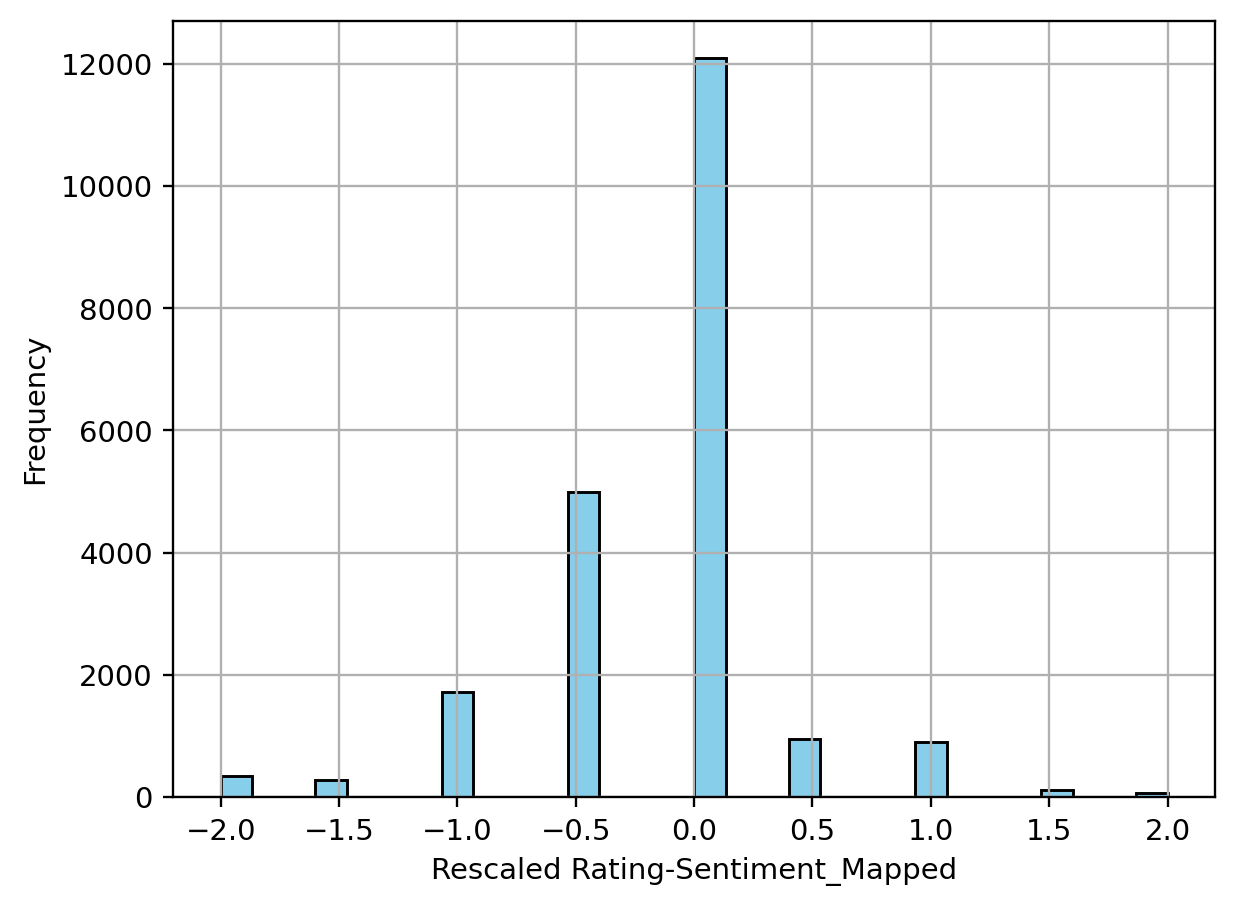

In [ ]:
# Plot histogram
plt.rcParams['figure.dpi'] = 210
plt.hist(filtered_df['Sentiment difference'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Rescaled Rating-Sentiment_Mapped')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

In [ ]:
final_df = filtered_df[abs(filtered_df['Sentiment difference']) <= 0.5]

In [ ]:
final_df

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,VADER,GOOG,Sentiment,Sentiment_Mapped
0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,1,0.336,1,0,0.9827,1.0,0.0,1,1,1,NaN
1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,1,0.334,1,1,0.9300,0.5,-0.5,1,1,1,NaN
2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,1,0.435,1,1,0.9589,1.0,0.0,1,1,1,NaN
3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,0,0.175,1,1,0.9524,1.0,0.0,1,1,1,NaN
4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,1,0.499,1,1,0.9681,0.5,-0.5,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21465,21465,21465,21471,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Horrible,colour faded away one wash,-1,-0.919,0,-1,0.0000,-1.0,0.0,0,-1,-1,NaN
21466,21466,21466,21472,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,amazing product ! loved,1,0.924,1,1,0.8398,1.0,0.0,1,1,1,NaN
21467,21467,21467,21473,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Nice product,like product .,1,0.935,0,1,0.3612,0.5,-0.5,1,1,1,NaN
21468,21468,21468,21474,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,good . color fade breach also .,1,0.056,1,1,0.4404,1.0,0.0,1,0,1,NaN


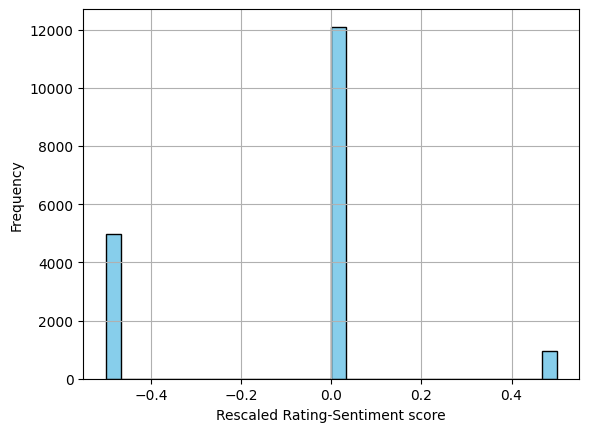

In [ ]:
plt.hist(final_df['Sentiment difference'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Rescaled Rating-Sentiment score')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

In [ ]:
sentiment_mapping = {-1:'negative', 0: 'neutral/mixed', 1:'positive'}
# Create a new column using map
final_df[['AWS','MSFT','IBM','GOOG','VADER','Sentiment']]=final_df[['AWS','MSFT','IBM','GOOG','VADER','Sentiment']].applymap(lambda x: sentiment_mapping.get(x, x))

<ipython-input-208-dcb63ea8b157>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[['AWS','MSFT','IBM','GOOG','VADER','Sentiment']]=final_df[['AWS','MSFT','IBM','GOOG','VADER','Sentiment']].applymap(lambda x: sentiment_mapping.get(x, x))


In [ ]:
final_df

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,VADER,GOOG,Sentiment,Sentiment_Mapped
0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,positive,0.336,positive,neutral/mixed,0.9827,1.0,0.0,positive,positive,positive,NaN
1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,positive,0.334,positive,positive,0.9300,0.5,-0.5,positive,positive,positive,NaN
2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,positive,0.435,positive,positive,0.9589,1.0,0.0,positive,positive,positive,NaN
3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,neutral/mixed,0.175,positive,positive,0.9524,1.0,0.0,positive,positive,positive,NaN
4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,positive,0.499,positive,positive,0.9681,0.5,-0.5,positive,positive,positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21465,21465,21465,21471,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Horrible,colour faded away one wash,negative,-0.919,neutral/mixed,negative,0.0000,-1.0,0.0,neutral/mixed,negative,negative,NaN
21466,21466,21466,21472,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,amazing product ! loved,positive,0.924,positive,positive,0.8398,1.0,0.0,positive,positive,positive,NaN
21467,21467,21467,21473,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Nice product,like product .,positive,0.935,neutral/mixed,positive,0.3612,0.5,-0.5,positive,positive,positive,NaN
21468,21468,21468,21474,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,good . color fade breach also .,positive,0.056,positive,positive,0.4404,1.0,0.0,positive,neutral/mixed,positive,NaN


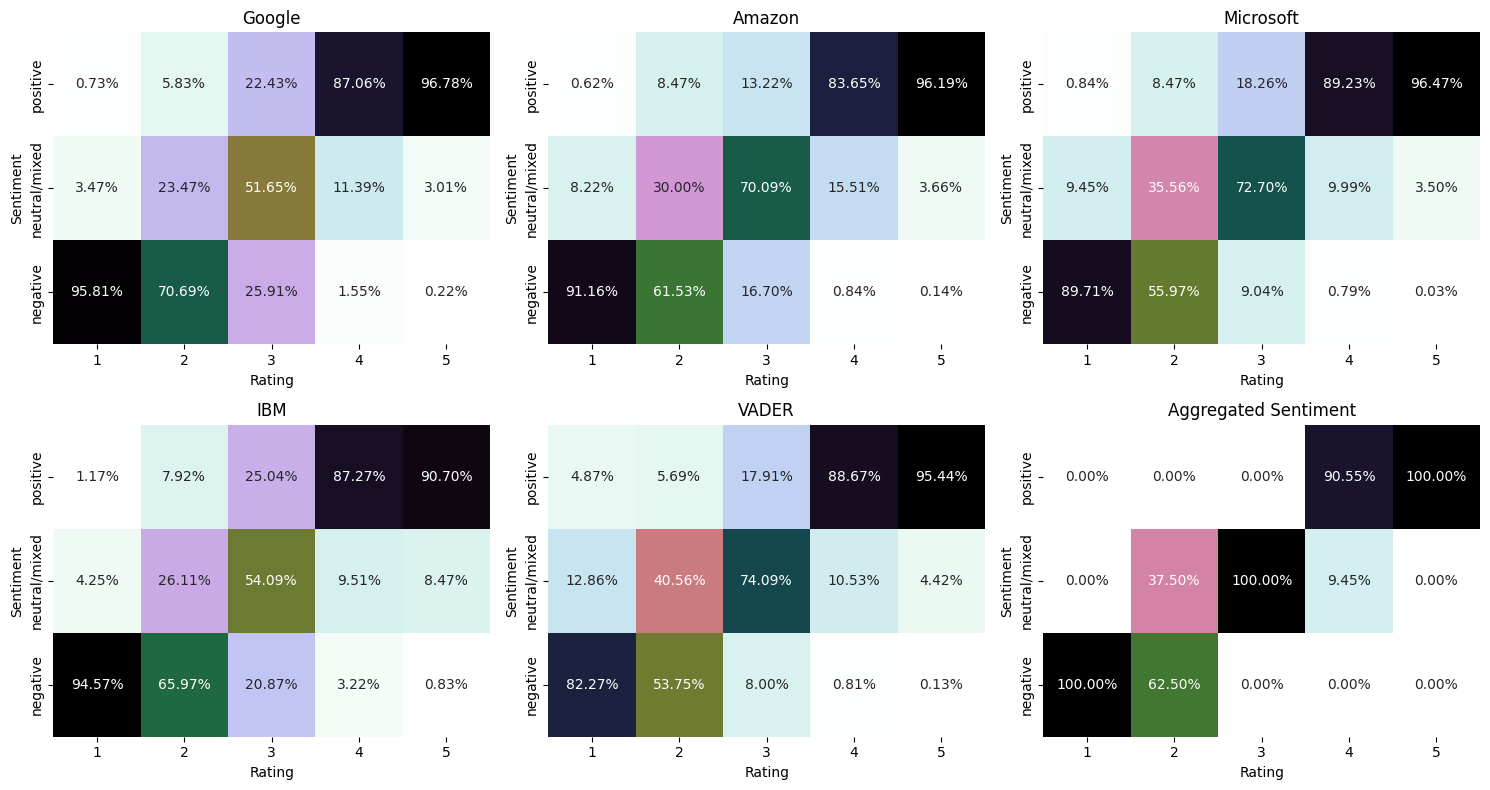

In [ ]:
# Create subplots
num_rows = 2
num_cols = (len(column_names) + 1) // num_rows  # Adding 1 to include the Rate column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten axes if necessary
axes = axes.flatten()

# Iterate over column names and create tables
for i, (column, name) in enumerate(column_names.items()):
    table_data = final_df.groupby([column, 'Rate']).size().unstack().reindex(order).fillna(0)
    # Normalize each row separately to ensure that percentages sum up to 100% for each rating
    table_data = table_data.div(table_data.sum(axis=0), axis=1)
    sns.heatmap(table_data, annot=True, cmap='cubehelix_r', ax=axes[i], cbar=False, fmt=".2%")
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Sentiment')

# Remove empty subplot if the number of columns is odd
if len(column_names) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
#final_df.to_csv('/content/drive/MyDrive/Bert/flipkart_curated_training.csv')

###All dataframes should be reloaded at this point to run the algorithm

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

<ipython-input-217-a293d0bf27f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Sentiment'] = label_encoder.fit_transform(final_df['Sentiment'])


Training Fold 1/5...
Epoch 1/10
451/451 [==============================] - 68s 146ms/step - loss: 0.3069 - accuracy: 0.8902 - val_loss: 0.1657 - val_accuracy: 0.9390
Epoch 2/10
  1/451 [..............................] - ETA: 53s - loss: 0.1100 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 72s 159ms/step - loss: 0.1320 - accuracy: 0.9491 - val_loss: 0.1531 - val_accuracy: 0.9435
Epoch 3/10
451/451 [==============================] - 67s 148ms/step - loss: 0.1044 - accuracy: 0.9612 - val_loss: 0.1302 - val_accuracy: 0.9534
Epoch 4/10
451/451 [==============================] - 63s 139ms/step - loss: 0.0871 - accuracy: 0.9688 - val_loss: 0.1299 - val_accuracy: 0.9559
Epoch 5/10
451/451 [==============================] - 65s 145ms/step - loss: 0.0765 - accuracy: 0.9724 - val_loss: 0.1241 - val_accuracy: 0.9593
Epoch 6/10
113/113 [==============================] - 5s 45ms/step - loss: 0.1239 - accuracy: 0.9606
Validation Loss: 0.12388990819454193, Validation Accuracy: 0.9606429934501648
113/113 [==============================] - 7s 59ms/step


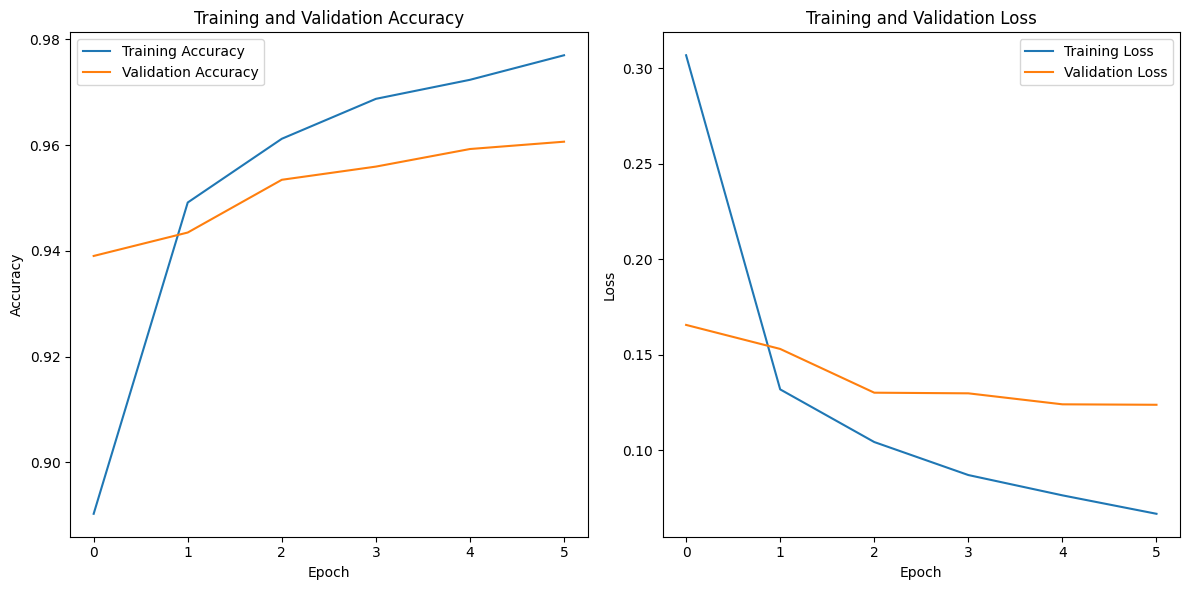

Training Fold 2/5...
Epoch 1/10
451/451 [==============================] - 66s 141ms/step - loss: 0.3170 - accuracy: 0.8873 - val_loss: 0.1848 - val_accuracy: 0.9271
Epoch 2/10
  1/451 [..............................] - ETA: 58s - loss: 0.1959 - accuracy: 0.9062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 62s 138ms/step - loss: 0.1416 - accuracy: 0.9466 - val_loss: 0.1504 - val_accuracy: 0.9468
Epoch 3/10
451/451 [==============================] - 65s 144ms/step - loss: 0.1243 - accuracy: 0.9545 - val_loss: 0.1478 - val_accuracy: 0.9454
Epoch 4/10
451/451 [==============================] - 61s 136ms/step - loss: 0.0922 - accuracy: 0.9660 - val_loss: 0.1493 - val_accuracy: 0.9484
Epoch 5/10
113/113 [==============================] - 5s 43ms/step - loss: 0.1493 - accuracy: 0.9484
Validation Loss: 0.14930947124958038, Validation Accuracy: 0.9484478831291199
113/113 [==============================] - 7s 59ms/step


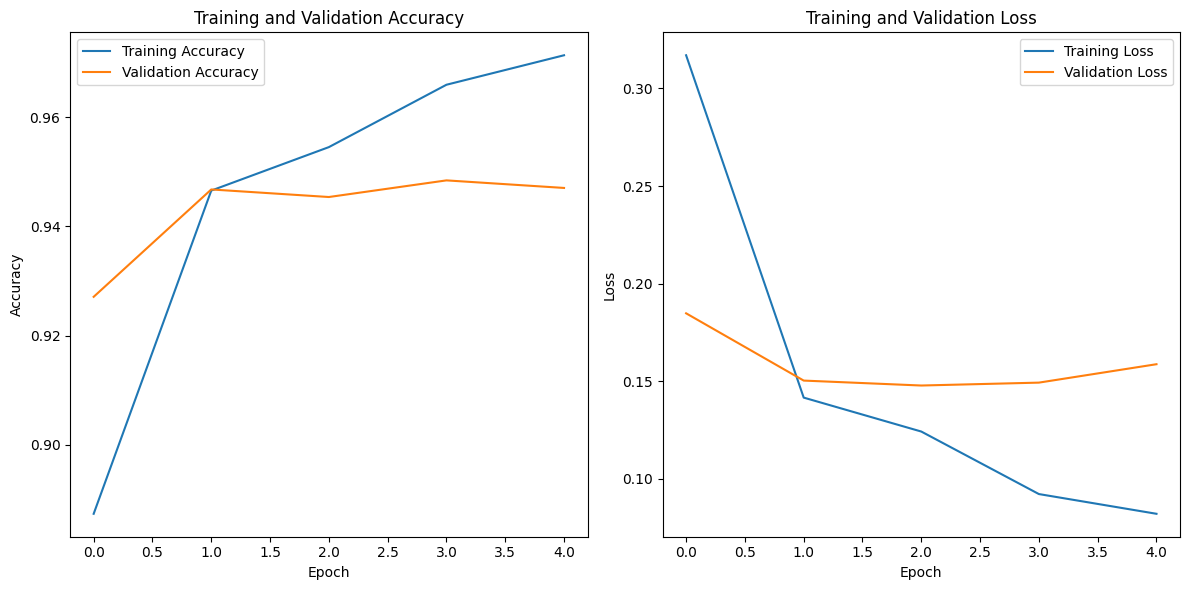

Training Fold 3/5...
Epoch 1/10
451/451 [==============================] - 66s 142ms/step - loss: 0.2981 - accuracy: 0.8922 - val_loss: 0.1574 - val_accuracy: 0.9379
Epoch 2/10
  1/451 [..............................] - ETA: 49s - loss: 0.1694 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 60s 134ms/step - loss: 0.1380 - accuracy: 0.9497 - val_loss: 0.1391 - val_accuracy: 0.9451
Epoch 3/10
451/451 [==============================] - 67s 149ms/step - loss: 0.1078 - accuracy: 0.9601 - val_loss: 0.1245 - val_accuracy: 0.9557
Epoch 4/10
451/451 [==============================] - 62s 137ms/step - loss: 0.0893 - accuracy: 0.9665 - val_loss: 0.1249 - val_accuracy: 0.9581
Epoch 5/10
451/451 [==============================] - 62s 136ms/step - loss: 0.0757 - accuracy: 0.9726 - val_loss: 0.1222 - val_accuracy: 0.9590
Epoch 6/10
113/113 [==============================] - 6s 57ms/step - loss: 0.1267 - accuracy: 0.9593
Validation Loss: 0.12667258083820343, Validation Accuracy: 0.959257185459137
113/113 [==============================] - 5s 43ms/step


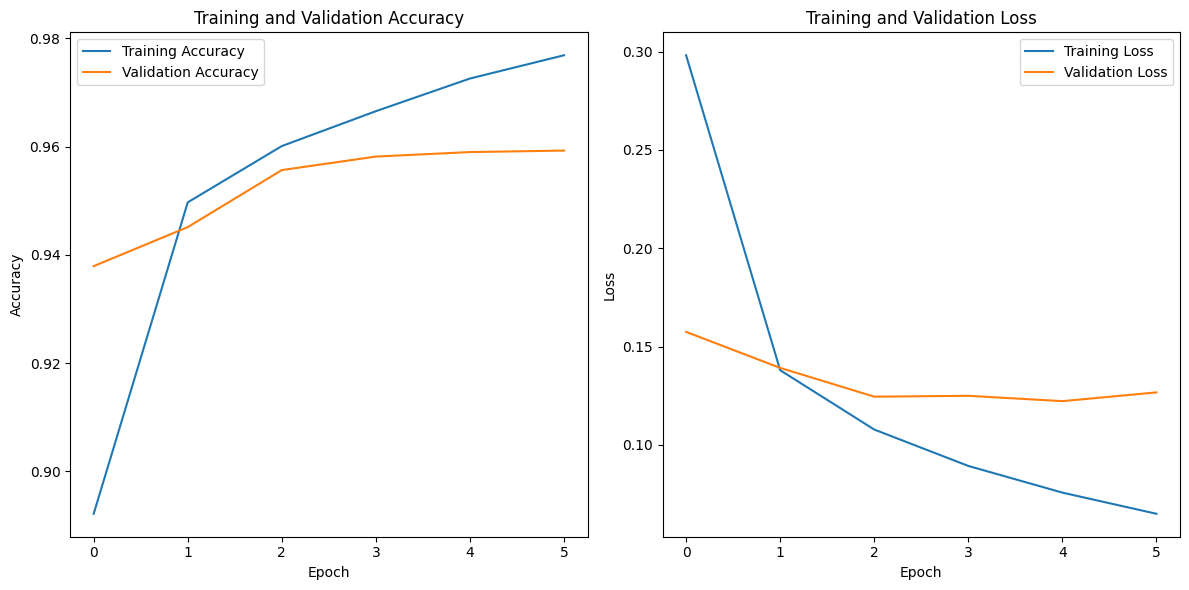

Training Fold 4/5...
Epoch 1/10
451/451 [==============================] - 67s 143ms/step - loss: 0.3037 - accuracy: 0.8894 - val_loss: 0.1890 - val_accuracy: 0.9343
Epoch 2/10
  1/451 [..............................] - ETA: 48s - loss: 0.1947 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 68s 151ms/step - loss: 0.1336 - accuracy: 0.9492 - val_loss: 0.1438 - val_accuracy: 0.9507
Epoch 3/10
451/451 [==============================] - 68s 150ms/step - loss: 0.1055 - accuracy: 0.9605 - val_loss: 0.1369 - val_accuracy: 0.9537
Epoch 4/10
451/451 [==============================] - 65s 144ms/step - loss: 0.0848 - accuracy: 0.9696 - val_loss: 0.1410 - val_accuracy: 0.9496
Epoch 5/10
113/113 [==============================] - 5s 46ms/step - loss: 0.1502 - accuracy: 0.9551
Validation Loss: 0.1501619815826416, Validation Accuracy: 0.9550997614860535
113/113 [==============================] - 7s 59ms/step


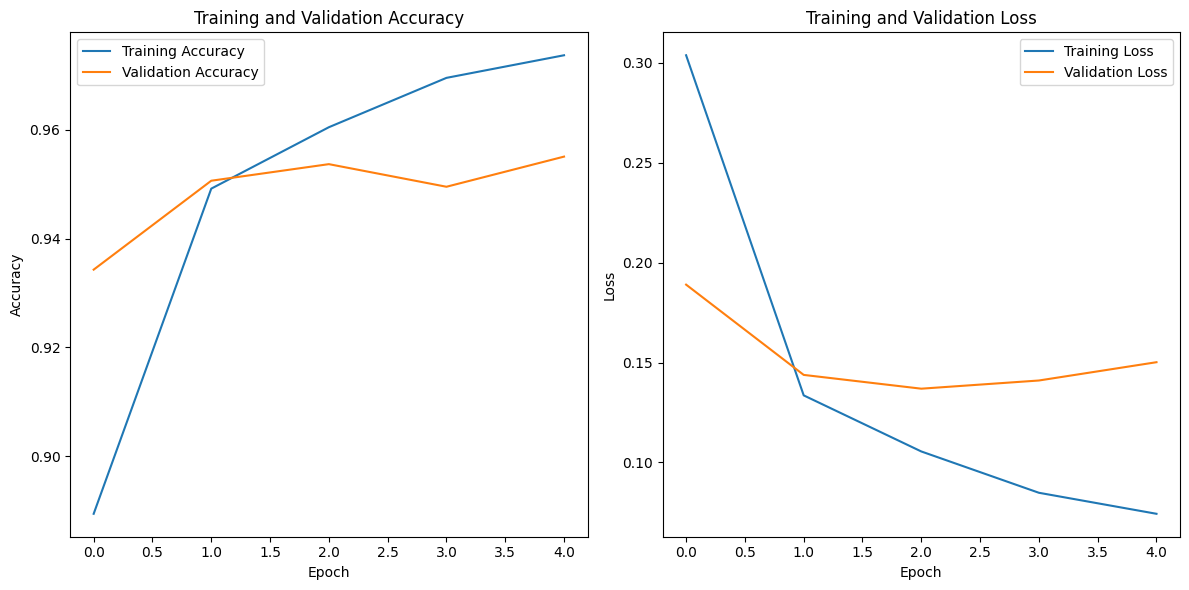

Training Fold 5/5...
Epoch 1/10
451/451 [==============================] - 67s 143ms/step - loss: 0.3088 - accuracy: 0.8852 - val_loss: 0.1659 - val_accuracy: 0.9396
Epoch 2/10
  1/451 [..............................] - ETA: 53s - loss: 0.1519 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 63s 140ms/step - loss: 0.1388 - accuracy: 0.9476 - val_loss: 0.1342 - val_accuracy: 0.9507
Epoch 3/10
451/451 [==============================] - 63s 141ms/step - loss: 0.1066 - accuracy: 0.9602 - val_loss: 0.1255 - val_accuracy: 0.9545
Epoch 4/10
451/451 [==============================] - 61s 136ms/step - loss: 0.0886 - accuracy: 0.9669 - val_loss: 0.1250 - val_accuracy: 0.9554
Epoch 5/10
113/113 [==============================] - 5s 48ms/step - loss: 0.1303 - accuracy: 0.9590
Validation Loss: 0.13033632934093475, Validation Accuracy: 0.9589800238609314
113/113 [==============================] - 6s 46ms/step


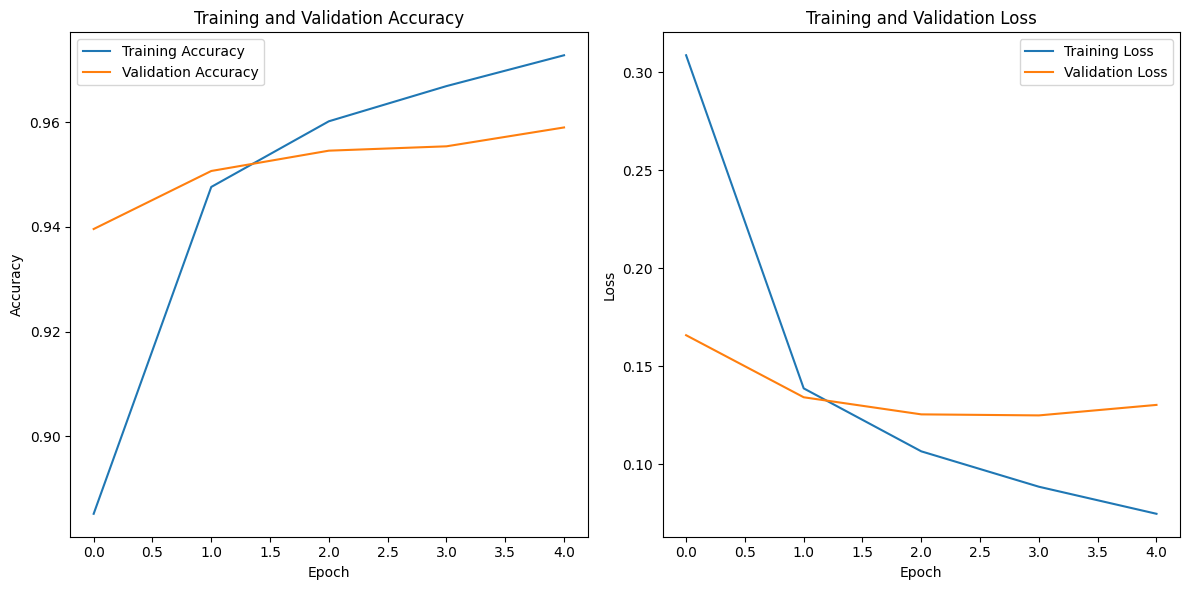

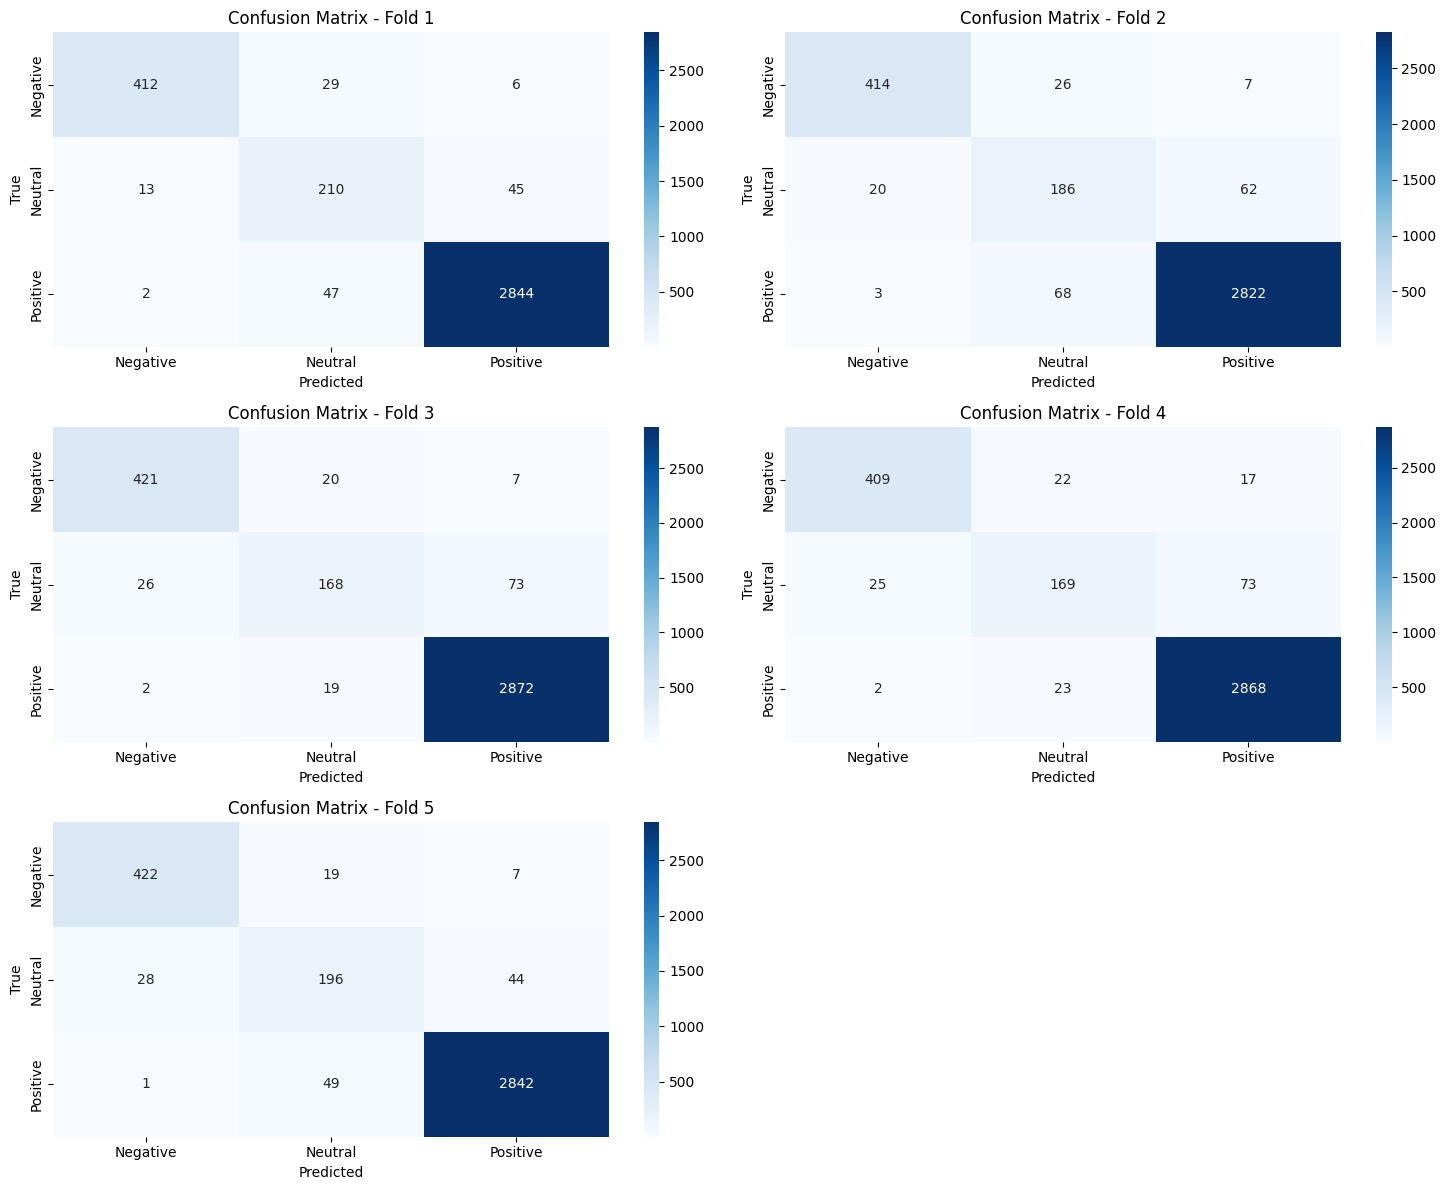

Average Accuracy Across 5 Folds: 0.9564855694770813

Average Classification Report Across All Folds:
   Class  precision   recall  f1-score
Negative   0.944730 0.928504  0.936458
 Neutral   0.748458 0.694226  0.717072
Positive   0.976672 0.985066  0.980825


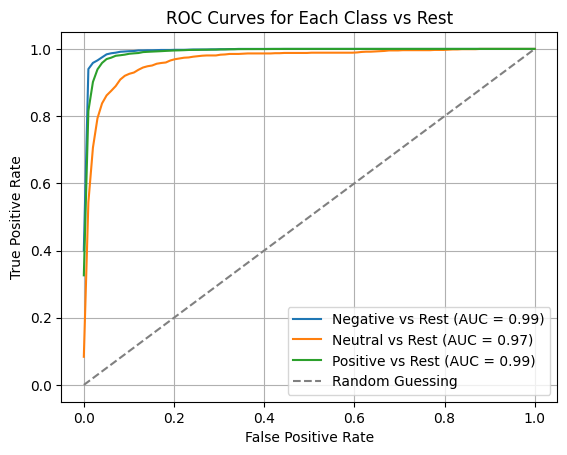

In [ ]:
# Use label encoding to convert string labels to numerical labels
label_encoder = LabelEncoder()
final_df['Sentiment'] = label_encoder.fit_transform(final_df['Sentiment'])

# Tokenize text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(final_df['Summary'])
sequences = tokenizer.texts_to_sequences(final_df['Summary'])

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_len)

# Define number of folds
n_folds = 5

# Initialize lists to store accuracy, precision, recall, and F1-score for each fold
acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
all_conf_matrices = []

# Initialize lists to store false positive rate, true positive rate, and AUC for each class
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Define StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize DataFrame to store classification report for each fold
classification_reports = []

# Iterate over folds
for fold_index, (train_index, val_index) in enumerate(skf.split(sequences, final_df['Sentiment'])):
    print(f"Training Fold {fold_index + 1}/{n_folds}...")

    # Split data into train and validation sets
    X_train, X_val = sequences[train_index], sequences[val_index]
    y_train, y_val = final_df['Sentiment'].iloc[train_index], final_df['Sentiment'].iloc[val_index]

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.01)
    checkpoint_path = f"fold_{fold_index + 1}_best_model.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)

    # Build RNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words, 64, input_length=max_len),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

    # Load best model from checkpoint
    model.load_weights(checkpoint_path)

    # Evaluate model
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

    # Store accuracy for this fold
    acc_per_fold.append(accuracy)

    # Generate classification report
    y_pred_proba = model.predict(X_val)
    y_pred = np.argmax(y_pred_proba, axis=1)
    class_names = ['Negative', 'Neutral', 'Positive']
    report = classification_report(y_val, y_pred, target_names=class_names, output_dict=True)

    # Store classification report for this fold
    classification_reports.append(report)

    # Calculate and store ROC curve and AUC for each class
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_val == i, y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        if class_name not in fpr_dict:
            fpr_dict[class_name] = []
            tpr_dict[class_name] = []
            roc_auc_dict[class_name] = []
        fpr_dict[class_name].append(fpr)
        tpr_dict[class_name].append(tpr)
        roc_auc_dict[class_name].append(roc_auc)

    # Store accuracy for this fold
    acc_per_fold.append(accuracy)

    # Generate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    all_conf_matrices.append(cm)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



# Display confusion matrices for all folds
plt.figure(figsize=(15, 12))
for i, cm in enumerate(all_conf_matrices, 1):
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {i}')
plt.tight_layout()
plt.show()

# Calculate average accuracy across all folds
avg_accuracy = np.mean(acc_per_fold)
print(f'Average Accuracy Across {n_folds} Folds: {avg_accuracy}')


# Calculate average precision, recall, and F1-score for each class
avg_metrics = {'Class': class_names}
for metric in ['precision', 'recall', 'f1-score']:
    avg_metrics[metric] = [np.mean([report[class_name][metric] for report in classification_reports]) for class_name in class_names]

# Convert average metrics to DataFrame
avg_metrics_df = pd.DataFrame(avg_metrics)

# Print average classification report
print("\nAverage Classification Report Across All Folds:")
print(avg_metrics_df.to_string(index=False))

# Calculate average ROC curve and AUC for each class
for class_name in class_names:
    # Interpolate mean ROC curve
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    for i in range(n_folds):
        tprs.append(np.interp(mean_fpr, fpr_dict[class_name][i], tpr_dict[class_name][i]))
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    # Plot ROC curve
    plt.plot(mean_fpr, mean_tpr, label=f'{class_name} vs Rest (AUC = {mean_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class vs Rest')
plt.legend()
plt.grid(True)
plt.show()

##Test RNN on the Big Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sent2.csv')

<ipython-input-3-6dea948213dd>:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sent2.csv')


In [ ]:
test_df = df[df['MSFT'].isna()]

In [ ]:
test_df

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference
21470,21470,21470,21476,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,3,Just okay,good,positive,0.898,positive,NaN,0.4404,0.0,-0.898
21471,21471,21471,21477,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Classy product,satisfying product,positive,0.948,positive,NaN,0.4588,1.0,0.052
21472,21472,21472,21478,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Value-for-money,good collection,positive,0.947,positive,NaN,0.4404,0.5,-0.447
21473,21473,21473,21479,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Brilliant,good somthing dought,positive,0.896,positive,NaN,0.4404,1.0,0.104
21474,21474,21474,21480,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Useless product,waste money,negative,-0.930,negative,NaN,-0.4215,-1.0,-0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357523,357523,357523,359615,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,good,positive,NaN,NaN,NaN,0.4404,1.0,NaN
357524,357524,357524,359616,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,thanks,positive,NaN,NaN,NaN,0.4404,1.0,NaN
357525,357525,357525,359617,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,good,positive,NaN,NaN,NaN,0.4404,1.0,NaN
357526,357526,357526,359618,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Just wow!,super,positive,0.938,NaN,NaN,0.5994,1.0,0.062


In [ ]:
# Load the trained model
from tensorflow.keras.models import load_model
model = load_model('/content/fold_1_best_model.h5')

# Tokenize and pad sequences for the new data
sequences_new = tokenizer.texts_to_sequences(test_df['Summary'])
sequences_new = pad_sequences(sequences_new, maxlen=max_len)  # Assuming max_len is the same as in training

# Make predictions on the new data
predictions = model.predict(sequences_new)

# Optionally, convert predictions to labels if needed
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Add predicted sentiment to the DataFrame
test_df['Predicted Sentiment'] = predicted_labels
test_df.to_csv('/content/drive/MyDrive/Bert/flipkart_results_rnn.csv')

AttributeError: module 'tensorflow.python.data.ops.iterator_ops' has no attribute 'OwnedIterator'

##GRU

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_curated_training.csv')

Training Fold 1/5...
Epoch 1/20
451/451 [==============================] - 12s 19ms/step - loss: 0.2857 - accuracy: 0.8927 - val_loss: 0.1500 - val_accuracy: 0.9412
Epoch 2/20
  6/451 [..............................] - ETA: 4s - loss: 0.1809 - accuracy: 0.9271

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 7s 14ms/step - loss: 0.1321 - accuracy: 0.9498 - val_loss: 0.1320 - val_accuracy: 0.9521
Epoch 3/20
451/451 [==============================] - 6s 14ms/step - loss: 0.1011 - accuracy: 0.9628 - val_loss: 0.1217 - val_accuracy: 0.9559
Epoch 4/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0852 - accuracy: 0.9681 - val_loss: 0.1191 - val_accuracy: 0.9595
Epoch 5/20
451/451 [==============================] - 7s 14ms/step - loss: 0.0753 - accuracy: 0.9725 - val_loss: 0.1122 - val_accuracy: 0.9642
Epoch 6/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0642 - accuracy: 0.9768 - val_loss: 0.1241 - val_accuracy: 0.9609
Epoch 7/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0586 - accuracy: 0.9783 - val_loss: 0.1199 - val_accuracy: 0.9576
Epoch 8/20
113/113 [==============================] - 2s 10ms/step - loss: 0.1122 - accuracy: 0.9642
Validation Loss: 0.11224096268415451, Validation Acc

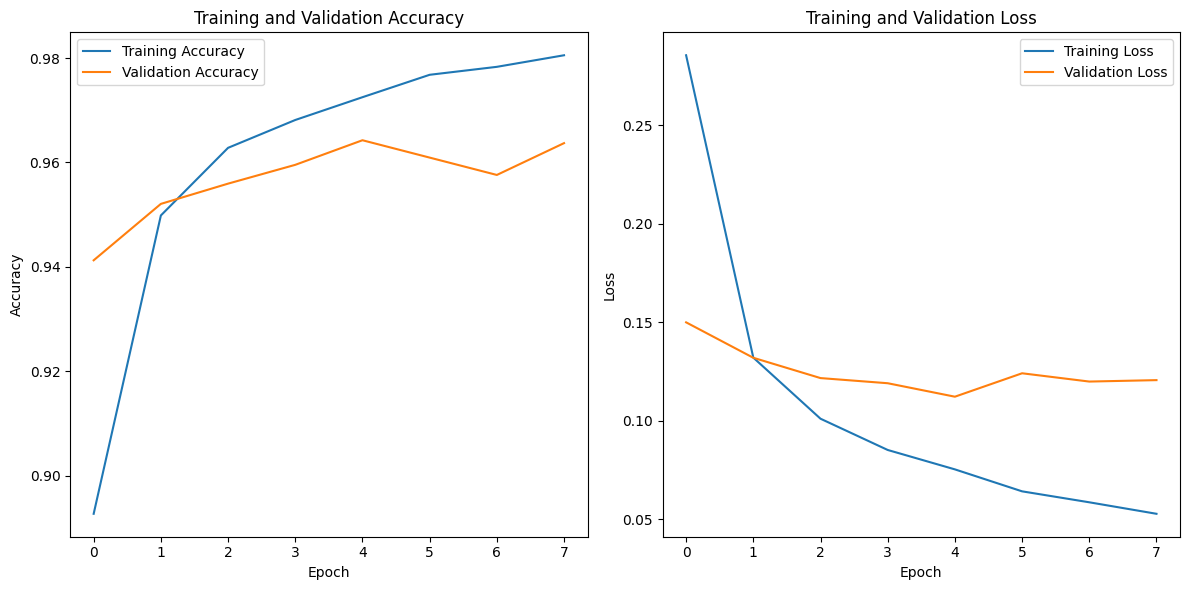

Training Fold 2/5...
Epoch 1/20
451/451 [==============================] - 11s 18ms/step - loss: 0.2968 - accuracy: 0.8910 - val_loss: 0.1676 - val_accuracy: 0.9318
Epoch 2/20
  6/451 [..............................] - ETA: 4s - loss: 0.1666 - accuracy: 0.9427

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 6s 14ms/step - loss: 0.1302 - accuracy: 0.9507 - val_loss: 0.1428 - val_accuracy: 0.9465
Epoch 3/20
451/451 [==============================] - 6s 14ms/step - loss: 0.1004 - accuracy: 0.9629 - val_loss: 0.1308 - val_accuracy: 0.9521
Epoch 4/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0852 - accuracy: 0.9693 - val_loss: 0.1403 - val_accuracy: 0.9493
Epoch 5/20
113/113 [==============================] - 2s 10ms/step - loss: 0.1427 - accuracy: 0.9529
Validation Loss: 0.1426965296268463, Validation Accuracy: 0.9528824687004089
113/113 [==============================] - 3s 13ms/step


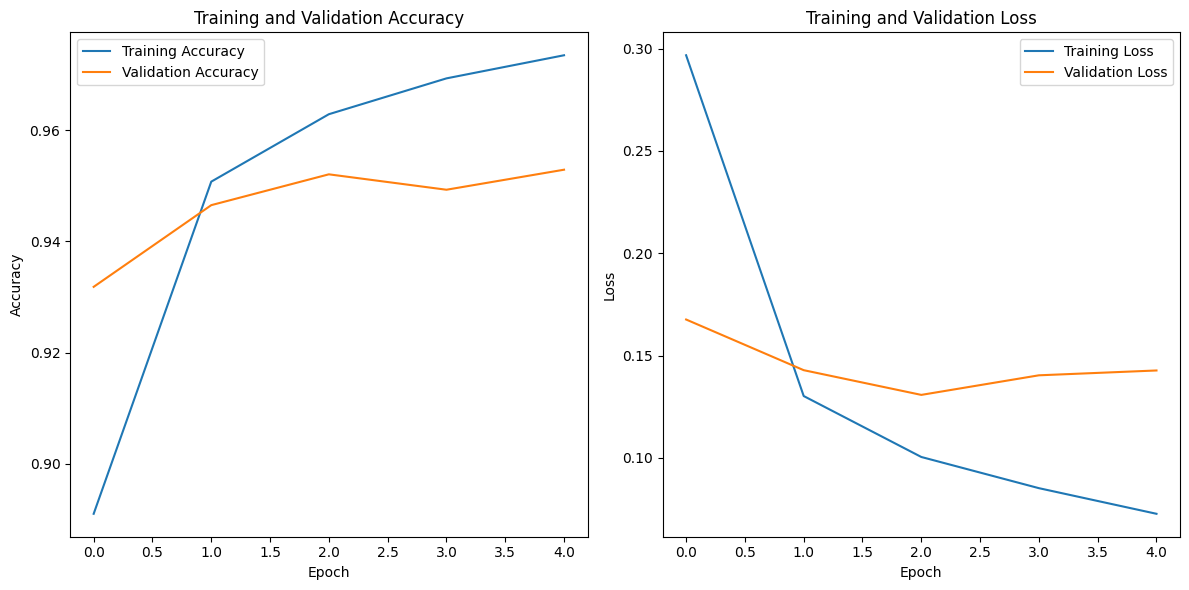

Training Fold 3/5...
Epoch 1/20
451/451 [==============================] - 12s 18ms/step - loss: 0.2880 - accuracy: 0.8955 - val_loss: 0.1772 - val_accuracy: 0.9387
Epoch 2/20
  6/451 [..............................] - ETA: 4s - loss: 0.1710 - accuracy: 0.9427

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 6s 14ms/step - loss: 0.1303 - accuracy: 0.9514 - val_loss: 0.1342 - val_accuracy: 0.9490
Epoch 3/20
451/451 [==============================] - 6s 14ms/step - loss: 0.1008 - accuracy: 0.9619 - val_loss: 0.1167 - val_accuracy: 0.9581
Epoch 4/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0846 - accuracy: 0.9677 - val_loss: 0.1189 - val_accuracy: 0.9601
Epoch 5/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0729 - accuracy: 0.9733 - val_loss: 0.1255 - val_accuracy: 0.9606
Epoch 6/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0629 - accuracy: 0.9756 - val_loss: 0.1260 - val_accuracy: 0.9620
Epoch 7/20
113/113 [==============================] - 2s 10ms/step - loss: 0.1260 - accuracy: 0.9620
Validation Loss: 0.12601839005947113, Validation Accuracy: 0.9620288014411926
113/113 [==============================] - 3s 13ms/step


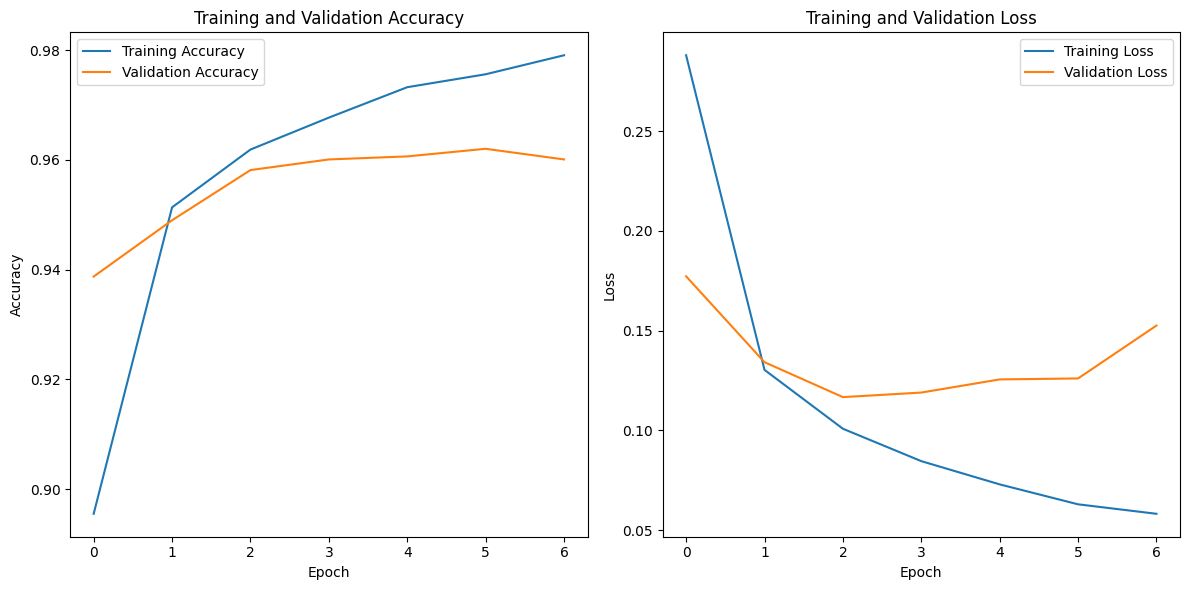

Training Fold 4/5...
Epoch 1/20
451/451 [==============================] - 12s 18ms/step - loss: 0.2954 - accuracy: 0.8901 - val_loss: 0.1614 - val_accuracy: 0.9412
Epoch 2/20
  6/451 [..............................] - ETA: 4s - loss: 0.2019 - accuracy: 0.9219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 6s 14ms/step - loss: 0.1363 - accuracy: 0.9482 - val_loss: 0.1349 - val_accuracy: 0.9482
Epoch 3/20
451/451 [==============================] - 6s 14ms/step - loss: 0.1064 - accuracy: 0.9608 - val_loss: 0.1350 - val_accuracy: 0.9523
Epoch 4/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0925 - accuracy: 0.9665 - val_loss: 0.1249 - val_accuracy: 0.9545
Epoch 5/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0761 - accuracy: 0.9721 - val_loss: 0.1310 - val_accuracy: 0.9545
Epoch 6/20
113/113 [==============================] - 2s 10ms/step - loss: 0.1433 - accuracy: 0.9568
Validation Loss: 0.14328725636005402, Validation Accuracy: 0.9567627310752869
113/113 [==============================] - 3s 13ms/step


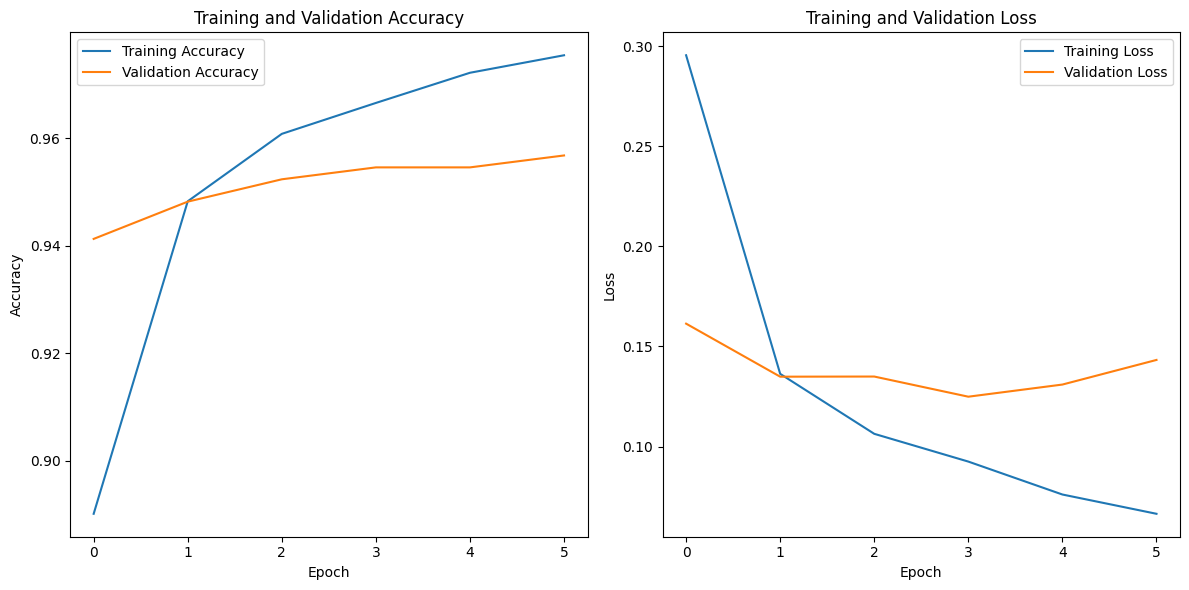

Training Fold 5/5...
Epoch 1/20
451/451 [==============================] - 12s 19ms/step - loss: 0.2877 - accuracy: 0.8937 - val_loss: 0.1774 - val_accuracy: 0.9354
Epoch 2/20
  6/451 [..............................] - ETA: 5s - loss: 0.1331 - accuracy: 0.9583

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 7s 15ms/step - loss: 0.1297 - accuracy: 0.9518 - val_loss: 0.1475 - val_accuracy: 0.9443
Epoch 3/20
451/451 [==============================] - 7s 15ms/step - loss: 0.1075 - accuracy: 0.9575 - val_loss: 0.1283 - val_accuracy: 0.9521
Epoch 4/20
451/451 [==============================] - 6s 14ms/step - loss: 0.0849 - accuracy: 0.9679 - val_loss: 0.1392 - val_accuracy: 0.9521
Epoch 5/20
451/451 [==============================] - 7s 15ms/step - loss: 0.0751 - accuracy: 0.9728 - val_loss: 0.1452 - val_accuracy: 0.9509
Epoch 6/20
113/113 [==============================] - 2s 10ms/step - loss: 0.1412 - accuracy: 0.9554
Validation Loss: 0.14123886823654175, Validation Accuracy: 0.955376923084259
113/113 [==============================] - 3s 13ms/step


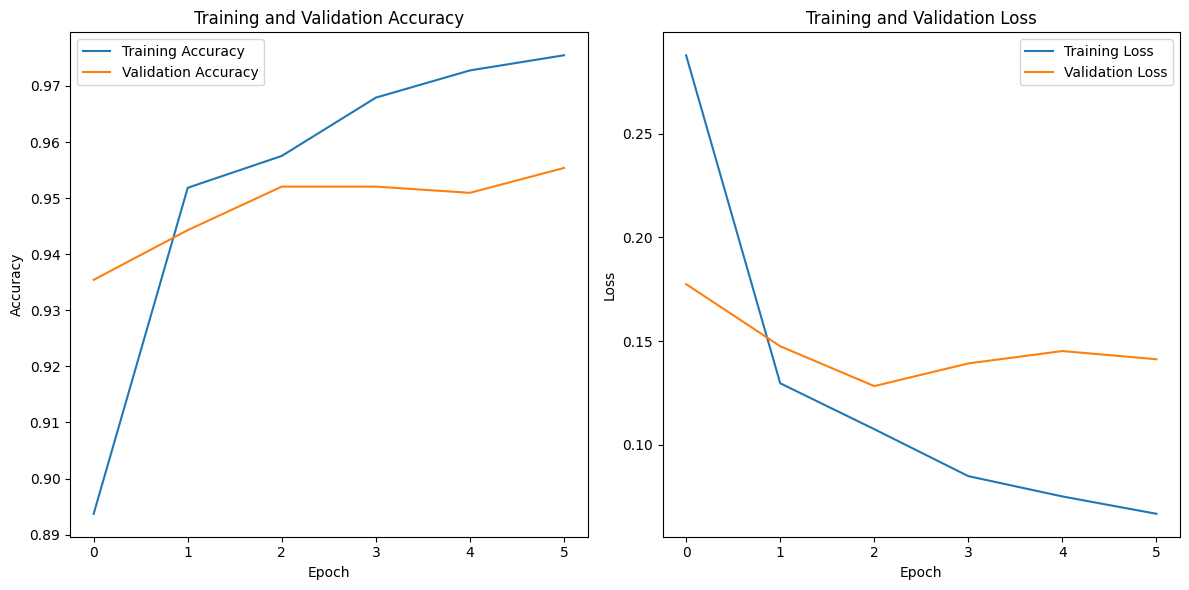

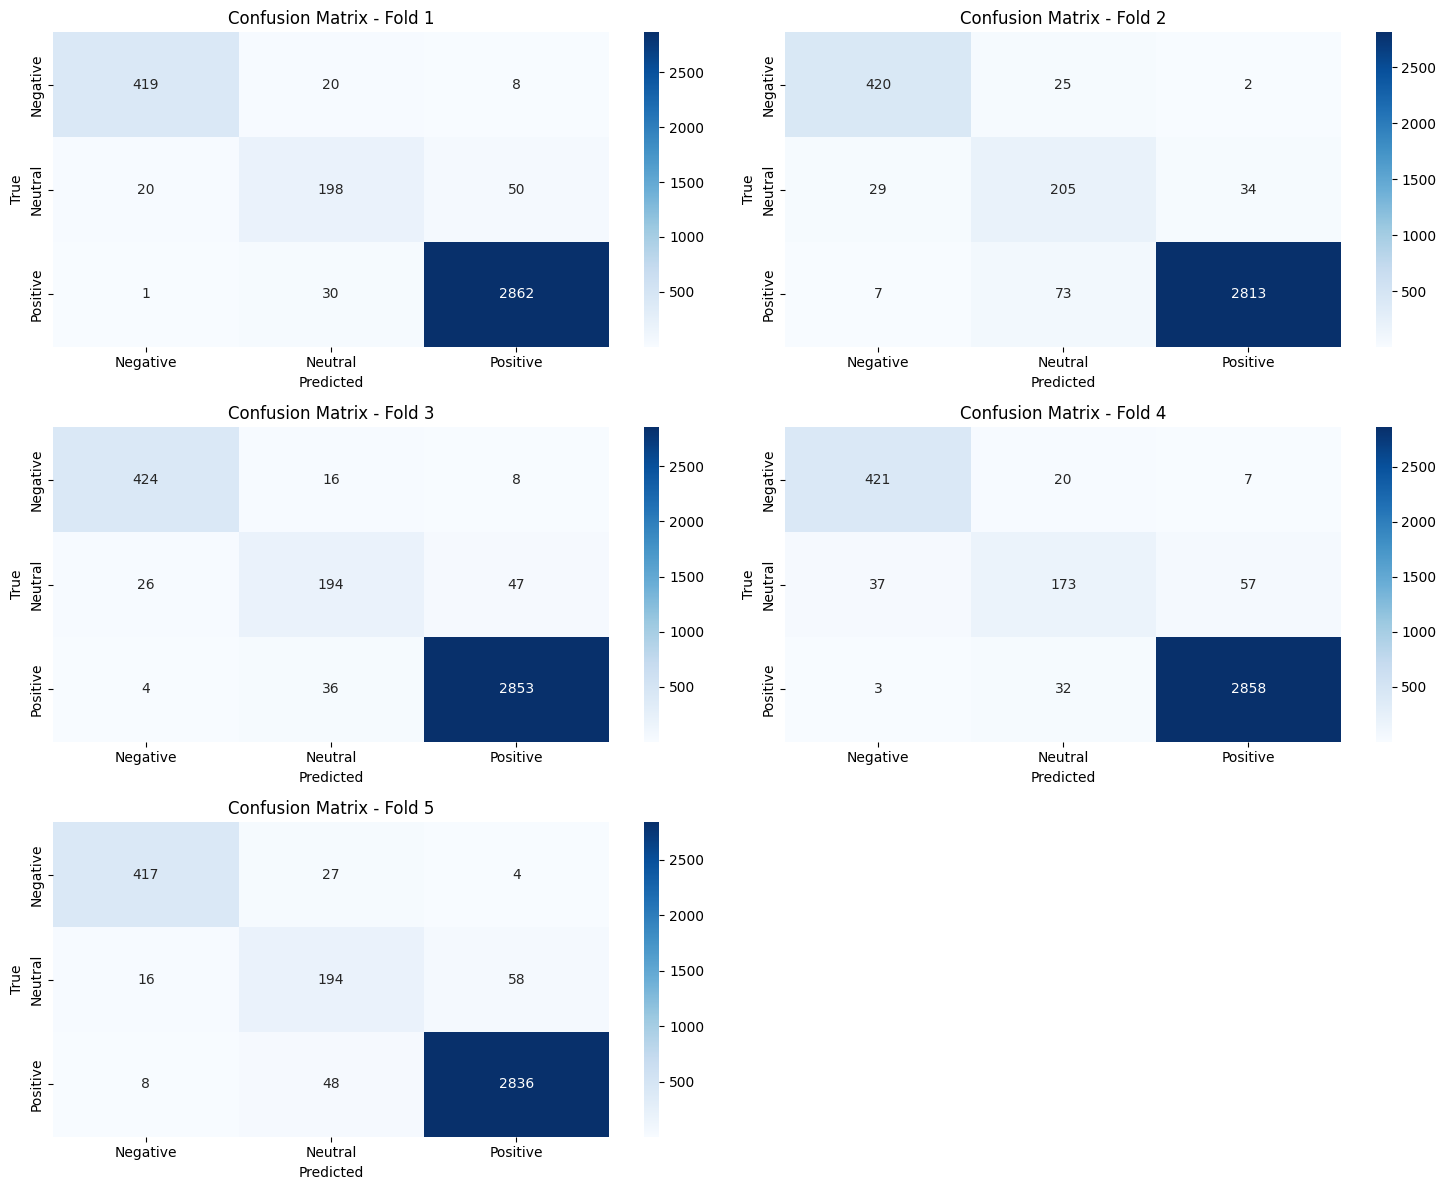

Average Accuracy Across 5 Folds: 0.9582594037055969

Average Classification Report Across All Folds:
   Class  precision   recall  f1-score
Negative   0.933211 0.938784  0.935910
 Neutral   0.750730 0.720429  0.733520
Positive   0.981058 0.983269  0.982141


In [ ]:
# Import TensorFlow and necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Initialize DataFrame to store classification report for each fold
classification_reports = []

# Use label encoding to convert string labels to numerical labels
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Tokenize text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Summary'])
sequences = tokenizer.texts_to_sequences(df['Summary'])

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_len)

# Define number of folds
n_folds = 5

# Initialize lists to store accuracy, precision, recall, and F1-score for each fold
acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
all_conf_matrices = []

# Initialize lists to store false positive rate, true positive rate, and AUC for each class
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Connect to TPU
#tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_resolver)
strategy = tf.distribute.TPUStrategy(tpu_resolver)

# Define the model building function
def build_model():
    with strategy.scope():
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(max_words, 64, input_length=max_len),
            tf.keras.layers.GRU(128, dropout=0.2, recurrent_dropout=0.2),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize lists to store results
acc_per_fold = []
all_conf_matrices = []

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True)

# Iterate over folds
for fold_index, (train_index, val_index) in enumerate(skf.split(sequences, df['Sentiment'])):
    print(f"Training Fold {fold_index + 1}/{n_folds}...")

    # Split data into train and validation sets
    X_train, X_val = sequences[train_index], sequences[val_index]
    y_train, y_val = df['Sentiment'].iloc[train_index], df['Sentiment'].iloc[val_index]

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.01)
    checkpoint_path = f"fold_{fold_index + 1}_best_model.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)

    # Build and compile model
    model = build_model()

    # Train model
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

    # Load best model from checkpoint
    model.load_weights(checkpoint_path)

    # Evaluate model
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

    # Generate classification report
    y_pred_proba = model.predict(X_val)
    y_pred = np.argmax(y_pred_proba, axis=1)
    class_names = ['Negative', 'Neutral', 'Positive']
    report = classification_report(y_val, y_pred, target_names=class_names, output_dict=True)

     # Store classification report for this fold
    classification_reports.append(report)


    # Calculate and store ROC curve and AUC for each class
    fpr_dict = {}
    tpr_dict = {}
    roc_auc_dict = {}
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_val == i, y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        fpr_dict[class_name] = fpr
        tpr_dict[class_name] = tpr
        roc_auc_dict[class_name] = roc_auc

    # Store accuracy for this fold
    acc_per_fold.append(accuracy)

    # Generate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    all_conf_matrices.append(cm)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display confusion matrices for all folds
plt.figure(figsize=(15, 12))
for i, cm in enumerate(all_conf_matrices, 1):
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {i}')
plt.tight_layout()
plt.show()

# Calculate average accuracy across all folds
avg_accuracy = np.mean(acc_per_fold)
print(f'Average Accuracy Across {n_folds} Folds: {avg_accuracy}')


# Calculate average precision, recall, and F1-score for each class
avg_metrics = {'Class': class_names}
for metric in ['precision', 'recall', 'f1-score']:
    avg_metrics[metric] = [np.mean([report[class_name][metric] for report in classification_reports]) for class_name in class_names]

# Convert average metrics to DataFrame
avg_metrics_df = pd.DataFrame(avg_metrics)

# Print average classification report
print("\nAverage Classification Report Across All Folds:")
print(avg_metrics_df.to_string(index=False))



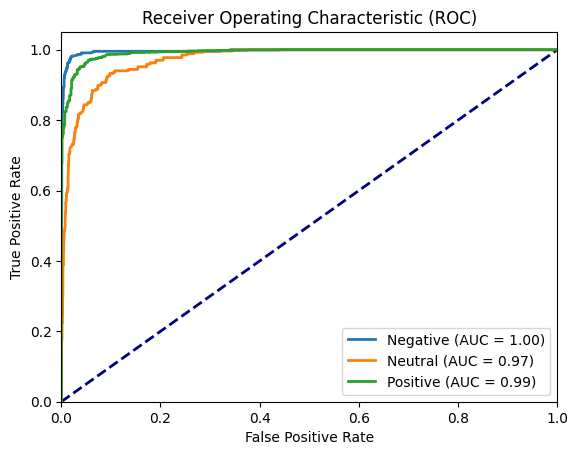

Gini coefficients:
Negative: 0.99
Neutral: 0.94
Positive: 0.98


In [ ]:
# Plot ROC curves
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
gini_dict = {}
for label in fpr_dict:
    fpr_data = fpr_dict[label]
    tpr_data = tpr_dict[label]

    roc_auc = auc(fpr_data, tpr_data)
    gini_coefficient = 2 * roc_auc - 1
    gini_dict[label] = gini_coefficient
    plt.plot(fpr_data, tpr_data, lw=2, label='%s (AUC = %0.2f)' % (label, roc_auc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("Gini coefficients:")
for label, gini in gini_dict.items():
    print(f"{label}: {gini:.2f}")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sent2.csv')

<ipython-input-6-6dea948213dd>:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sent2.csv')


In [ ]:
test_df = df[df['MSFT'].isna()]

In [ ]:
test_df=test_df.drop(columns=['MSFT'])
test_df=test_df.dropna()


In [ ]:
test_df

,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,VSC,Rescaled Rating,Sentiment difference
21470,21470,21470,21476,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,3,Just okay,good,positive,0.898,positive,0.4404,0.0,-0.898
21471,21471,21471,21477,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Classy product,satisfying product,positive,0.948,positive,0.4588,1.0,0.052
21472,21472,21472,21478,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Value-for-money,good collection,positive,0.947,positive,0.4404,0.5,-0.447
21473,21473,21473,21479,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Brilliant,good somthing dought,positive,0.896,positive,0.4404,1.0,0.104
21474,21474,21474,21480,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Useless product,waste money,negative,-0.930,negative,-0.4215,-1.0,-0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109645,109645,109645,111668,Google Home Mini with Google Assistant Smart S...,4998,5,Terrific purchase,good,positive,0.898,positive,0.4404,1.0,0.102
109646,109646,109646,111669,Google Home Mini with Google Assistant Smart S...,4998,5,Best in the market!,awesome,positive,0.944,positive,0.6249,1.0,0.056
109647,109647,109647,111670,Google Home Mini with Google Assistant Smart S...,4998,3,Does the job,get tired calling hey/okay google time n't sen...,negative,-0.892,negative,-0.6319,0.0,0.892
109648,109648,109648,111671,Google Home Mini with Google Assistant Smart S...,4998,5,Wonderful,superv product,positive,0.532,neutral/mixed,0.0000,1.0,0.468


In [ ]:
label_encoder = LabelEncoder()
# Load the trained model
from tensorflow.keras.models import load_model
#model = load_model('/content/fold_1_best_model.h5')

# Tokenize and pad sequences for the new data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
# Tokenize text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(test_df['Summary'])
sequences = tokenizer.texts_to_sequences(test_df['Summary'])

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_len)

sequences_new = tokenizer.texts_to_sequences(test_df['Summary'])
sequences_new = pad_sequences(sequences_new, maxlen=max_len)  # Assuming max_len is the same as in training


# Rebuild the model architecture
#model = build_model()

# Load the weights of the best model saved during training
model.load_weights("/content/fold_4_best_model.h5")  # Load weights from any fold, as they are identical

# Predict sentiment for new data
new_data_pred_proba = model.predict(sequences_new)
new_data_pred = np.argmax(new_data_pred_proba, axis=1)


# Add predicted sentiment to the DataFrame
test_df['Predicted Sentiment'] = new_data_pred
test_df.to_csv('/content/drive/MyDrive/Bert/flipkart_results_gru.csv')

2745/2745 [==============================] - 29s 10ms/step


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Add predicted sentiment to the DataFrame
test_df['Predicted Sentiment'] = new_data_pred
test_df.to_csv('/content/drive/MyDrive/Bert/flipkart_results_gru.csv')

##LSTM

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_curated_training.csv')

In [ ]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,VADER,GOOG,Sentiment,Sentiment_Mapped
0,0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,positive,0.336,positive,neutral/mixed,0.9827,1.0,0.0,positive,positive,positive,NaN
1,1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,positive,0.334,positive,positive,0.9300,0.5,-0.5,positive,positive,positive,NaN
2,2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,positive,0.435,positive,positive,0.9589,1.0,0.0,positive,positive,positive,NaN
3,3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,neutral/mixed,0.175,positive,positive,0.9524,1.0,0.0,positive,positive,positive,NaN
4,4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,positive,0.499,positive,positive,0.9681,0.5,-0.5,positive,positive,positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,21465,21465,21465,21471,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Horrible,colour faded away one wash,negative,-0.919,neutral/mixed,negative,0.0000,-1.0,0.0,neutral/mixed,negative,negative,NaN
18036,21466,21466,21466,21472,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,amazing product ! loved,positive,0.924,positive,positive,0.8398,1.0,0.0,positive,positive,positive,NaN
18037,21467,21467,21467,21473,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Nice product,like product .,positive,0.935,neutral/mixed,positive,0.3612,0.5,-0.5,positive,positive,positive,NaN
18038,21468,21468,21468,21474,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,good . color fade breach also .,positive,0.056,positive,positive,0.4404,1.0,0.0,positive,neutral/mixed,positive,NaN


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


# Use label encoding to convert string labels to numerical labels
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Tokenize text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Summary'])
sequences = tokenizer.texts_to_sequences(df['Summary'])

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_len)

# Define number of folds
n_folds = 1

# Initialize lists to store accuracy, precision, recall, and F1-score for each fold
acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
all_conf_matrices = []

# Initialize lists to store false positive rate, true positive rate, and AUC for each class
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Define StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize DataFrame to store classification report for each fold
classification_reports = []


# Iterate over folds
for fold_index, (train_index, val_index) in enumerate(skf.split(sequences, df['Sentiment'])):
    print(f"Training Fold {fold_index + 1}/{n_folds}...")

    # Split data into train and validation sets
    X_train, X_val = sequences[train_index], sequences[val_index]
    y_train, y_val = df['Sentiment'].iloc[train_index], df['Sentiment'].iloc[val_index]

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.01)
    checkpoint_path = f"fold_{fold_index + 1}_best_model.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)

    # Build LSTM model
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words, 64, input_length=max_len),
        tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

    # Load best model from checkpoint
    model.load_weights(checkpoint_path)

    # Evaluate model
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

    # Generate classification report
    y_pred_proba = model.predict(X_val)
    y_pred = np.argmax(y_pred_proba, axis=1)
    class_names = ['Negative', 'Neutral', 'Positive']
    report = classification_report(y_val, y_pred, target_names=class_names, output_dict=True)

    # Store classification report for this fold
    classification_reports.append(report)

    # Calculate and store ROC curve and AUC for each class
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_val == i, y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        if class_name not in fpr_dict:
            fpr_dict[class_name] = []
            tpr_dict[class_name] = []
            roc_auc_dict[class_name] = []
        fpr_dict[class_name].append(fpr)
        tpr_dict[class_name].append(tpr)
        roc_auc_dict[class_name].append(roc_auc)

    # Store accuracy for this fold
    acc_per_fold.append(accuracy)

    # Generate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    all_conf_matrices.append(cm)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display confusion matrices for all folds
plt.figure(figsize=(15, 12))
for i, cm in enumerate(all_conf_matrices, 1):
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {i}')
plt.tight_layout()
plt.show()

# Calculate average accuracy across all folds
avg_accuracy = np.mean(acc_per_fold)
print(f'Average Accuracy Across {n_folds} Folds: {avg_accuracy}')


# Calculate average precision, recall, and F1-score for each class
avg_metrics = {'Class': class_names}
for metric in ['precision', 'recall', 'f1-score']:
    avg_metrics[metric] = [np.mean([report[class_name][metric] for report in classification_reports]) for class_name in class_names]

# Convert average metrics to DataFrame
avg_metrics_df = pd.DataFrame(avg_metrics)

# Print average classification report
print("\nAverage Classification Report Across All Folds:")
print(avg_metrics_df.to_string(index=False))

# Calculate average ROC curve and AUC for each class
for class_name in class_names:
    # Interpolate mean ROC curve
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    for i in range(n_folds):
        tprs.append(np.interp(mean_fpr, fpr_dict[class_name][i], tpr_dict[class_name][i]))
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    # Plot ROC curve
    plt.plot(mean_fpr, mean_tpr, label=f'{class_name} vs Rest (AUC = {mean_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class vs Rest')
plt.legend()
plt.grid(True)
plt.show()

##Combine results from RNN and GRU into same df

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_results_rnn1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_results_gru1.csv')

<ipython-input-3-0e5623c83b2e>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_results_rnn1.csv')


In [ ]:
import pandas as pd

# Merge df1 and df2 based on 'ID'
df_merged = pd.merge(df1, df2[['ID', 'GRU']], on='ID', how='inner')

# Update df1 with the 'GRU' column from the merged dataframe
df1['GRU'] = df_merged['GRU']


In [ ]:
df1.to_csv('/content/drive/MyDrive/Bert/flipkart_results_merged.csv')

In [ ]:
df1

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,...,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,VADER,GOOG,Predicted Sentiment,RNN,GRU
0,21470,21470,21470,21476,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,3,Just okay,good,positive,...,positive,NaN,0.4404,0.0,-0.898,positive,positive,2,positive,positive
1,21471,21471,21471,21477,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Classy product,satisfying product,positive,...,positive,NaN,0.4588,1.0,0.052,positive,positive,2,positive,positive
2,21472,21472,21472,21478,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Value-for-money,good collection,positive,...,positive,NaN,0.4404,0.5,-0.447,positive,positive,2,positive,positive
3,21473,21473,21473,21479,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Brilliant,good somthing dought,positive,...,positive,NaN,0.4404,1.0,0.104,positive,positive,2,positive,positive
4,21474,21474,21474,21480,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Useless product,waste money,negative,...,negative,NaN,-0.4215,-1.0,-0.070,negative,negative,0,negative,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336053,357523,357523,357523,359615,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,good,positive,...,NaN,NaN,0.4404,1.0,NaN,positive,neutral/mixed,2,positive,NaN
336054,357524,357524,357524,359616,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,thanks,positive,...,NaN,NaN,0.4404,1.0,NaN,positive,neutral/mixed,2,positive,NaN
336055,357525,357525,357525,359617,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,good,positive,...,NaN,NaN,0.4404,1.0,NaN,positive,neutral/mixed,2,positive,NaN
336056,357526,357526,357526,359618,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Just wow!,super,positive,...,NaN,NaN,0.5994,1.0,0.062,positive,positive,2,positive,NaN


In [ ]:
df=df1.drop(columns=['MSFT'])
df=df.dropna()


##Analyze results


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_results_rnn.csv')

<ipython-input-17-51ba64002a26>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_results_rnn.csv')


In [ ]:
filtered_df = df.dropna(subset=['GOOG', 'AWS', 'VADER','IBM','Rescaled Rating', 'RNN','GRU'])

In [ ]:
filtered_df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,VSC,Rescaled Rating,Sentiment difference,VADER,GOOG,Predicted Sentiment,RNN,GRU
0,21470,21470,21470,21476,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,3,Just okay,good,1,0.898,1,0.4404,0.0,-0.898,1,1,2,1,1
1,21471,21471,21471,21477,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Classy product,satisfying product,1,0.948,1,0.4588,1.0,0.052,1,1,2,1,1
2,21472,21472,21472,21478,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Value-for-money,good collection,1,0.947,1,0.4404,0.5,-0.447,1,1,2,1,1
3,21473,21473,21473,21479,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Brilliant,good somthing dought,1,0.896,1,0.4404,1.0,0.104,1,1,2,1,1
4,21474,21474,21474,21480,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Useless product,waste money,-1,-0.930,-1,-0.4215,-1.0,-0.070,-1,-1,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87806,109276,109276,109276,111299,Google Home Mini with Google Assistant Smart S...,4998,5,Worth every penny,"excellent product , love",1,0.930,1,0.8360,1.0,0.070,1,1,2,1,1
87807,109277,109277,109277,111300,Google Home Mini with Google Assistant Smart S...,4998,5,Terrific purchase,best product,1,0.957,1,0.6369,1.0,0.043,1,1,2,1,1
87808,109278,109278,109278,111301,Google Home Mini with Google Assistant Smart S...,4998,5,Terrific purchase,fantastic,1,0.935,1,0.5574,1.0,0.065,1,1,2,1,-1
87809,109279,109279,109279,111302,Google Home Mini with Google Assistant Smart S...,4998,5,Wonderful,extremely good,1,0.925,1,0.4927,1.0,0.075,1,1,2,1,1


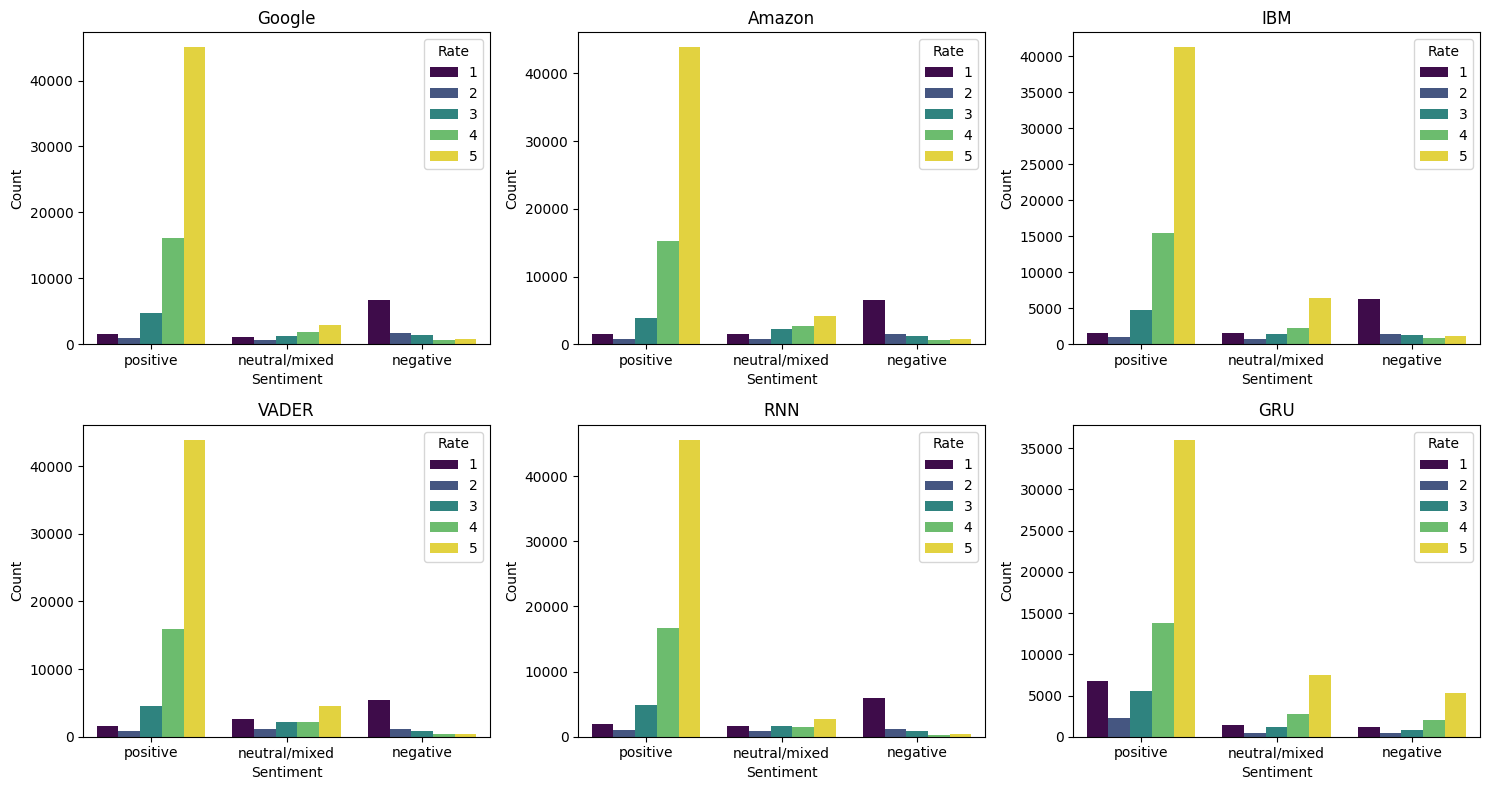

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to map original column names to desired names
column_names = {
    'GOOG': 'Google',
    'AWS': 'Amazon',
    #'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'VADER': 'VADER',
    #'Rescaled Rating' : "Rating",
    'RNN':'RNN',
    'GRU':'GRU'
}

# Create subplots
num_rows = 2
num_cols = (len(column_names) + 1) // num_rows  # Adding 1 to include the Rate column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten axes if necessary
axes = axes.flatten()

# Set the order of x-axis labels
order = ['positive', 'neutral/mixed', 'negative']

# Iterate over column names and create charts
for i, (column, name) in enumerate(column_names.items()):
    sns.countplot(data=filtered_df, x=column, hue='Rate', palette='viridis', ax=axes[i], order=order)
    axes[i].set_xlabel('Sentiment')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{name}')

# Remove empty subplot if the number of columns is odd
if len(column_names) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

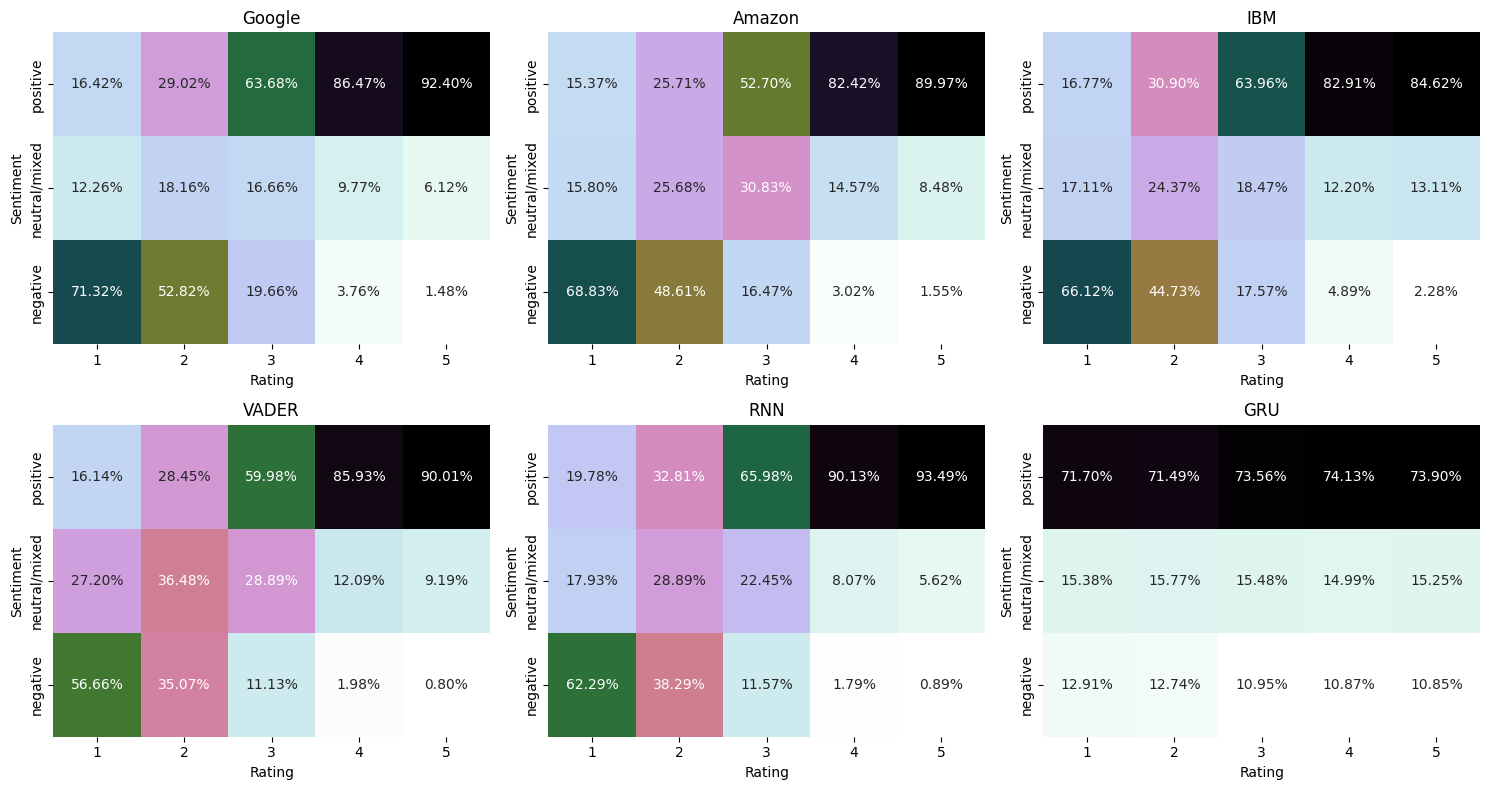

In [ ]:
# Create subplots
num_rows = 2
num_cols = (len(column_names) + 1) // num_rows  # Adding 1 to include the Rate column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten axes if necessary
axes = axes.flatten()

# Iterate over column names and create tables
for i, (column, name) in enumerate(column_names.items()):
    table_data = filtered_df.groupby([column, 'Rate']).size().unstack().reindex(order).fillna(0)
    # Normalize each row separately to ensure that percentages sum up to 100% for each rating
    table_data = table_data.div(table_data.sum(axis=0), axis=1)
    sns.heatmap(table_data, annot=True, cmap='cubehelix_r', ax=axes[i], cbar=False, fmt=".2%")
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Sentiment')

# Remove empty subplot if the number of columns is odd
if len(column_names) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

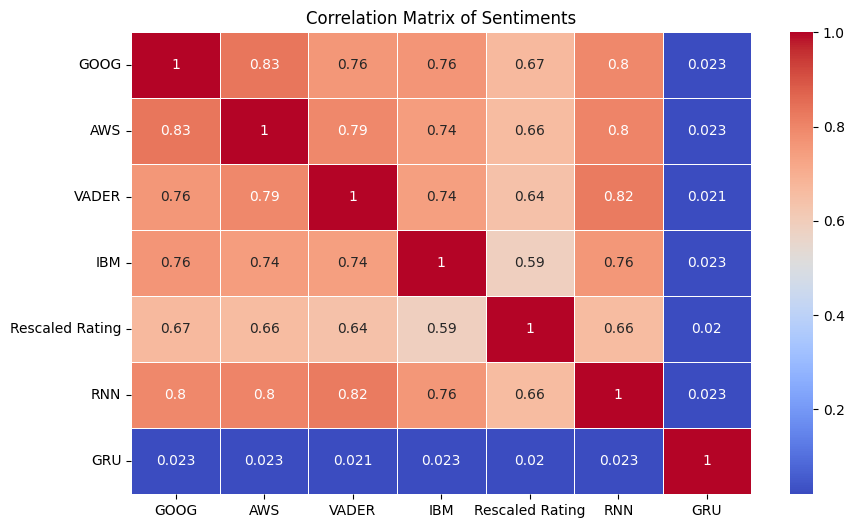

In [ ]:
import seaborn as sns
# Filter rows with values for all five columns
#filtered_df = dff.dropna(subset=['GOOG', 'AWS', 'VADER','MSFT','IBM','Sentiment','Rescaled Rating'])
#filtered_df=filtered_df[filtered_df['Sentiment'] != 'tie']
# Convert sentiment values to numerical values for correlation calculation
sentiment_mapping = {'negative': -1, 'neutral/mixed': 0, 'positive': 1, 'tie':0}
filtered_df.replace(sentiment_mapping, inplace=True)

# Calculate correlation matrix
correlation_matrix = filtered_df[['GOOG', 'AWS', 'VADER','IBM','Rescaled Rating','RNN','GRU']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sentiments')
plt.show()